# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `Telco Customer Churn` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

**By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.**

## Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_telco_churn.csv')

## Feature Understanding
*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GENDER
---------------


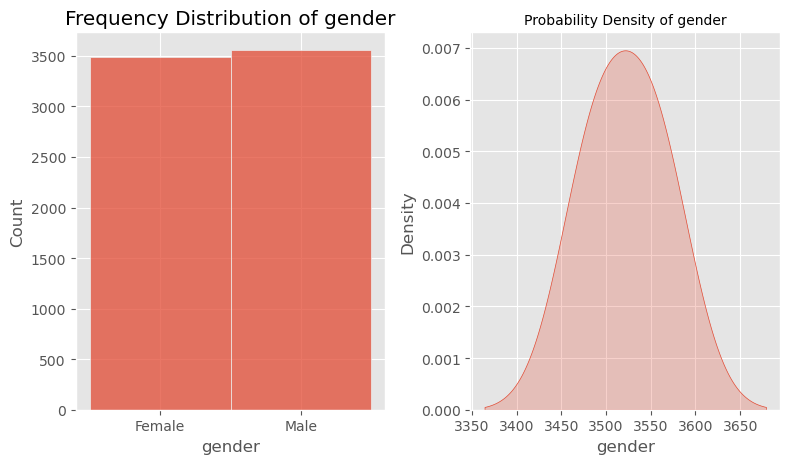


---------------
FEATURE: SENIORCITIZEN
---------------


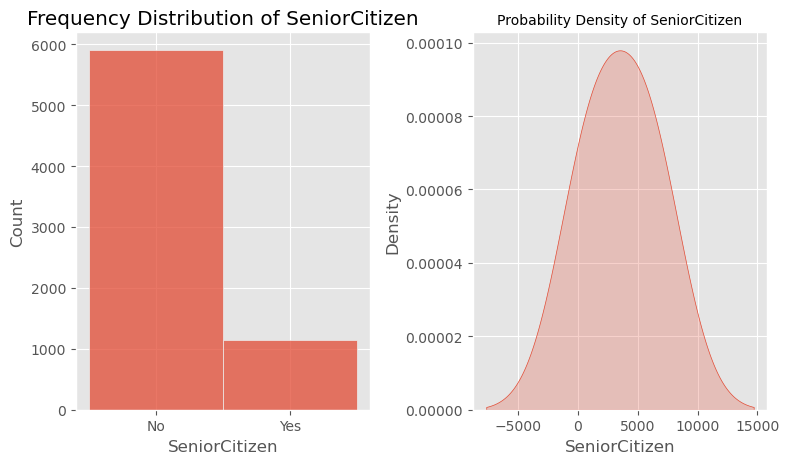


---------------
FEATURE: PARTNER
---------------


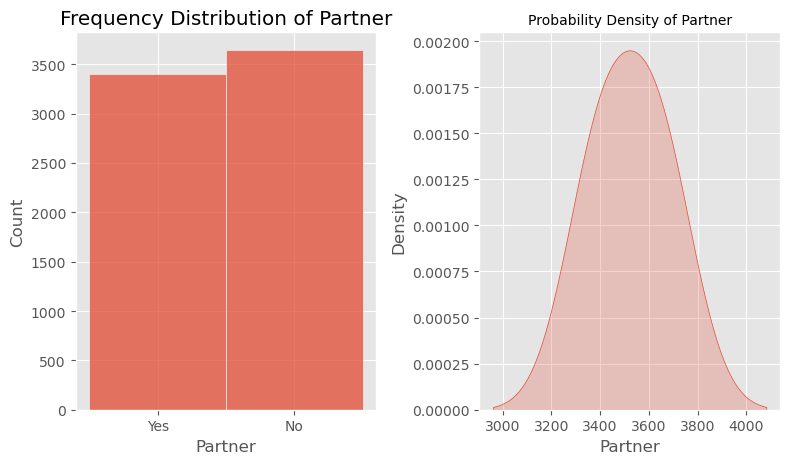


---------------
FEATURE: DEPENDENTS
---------------


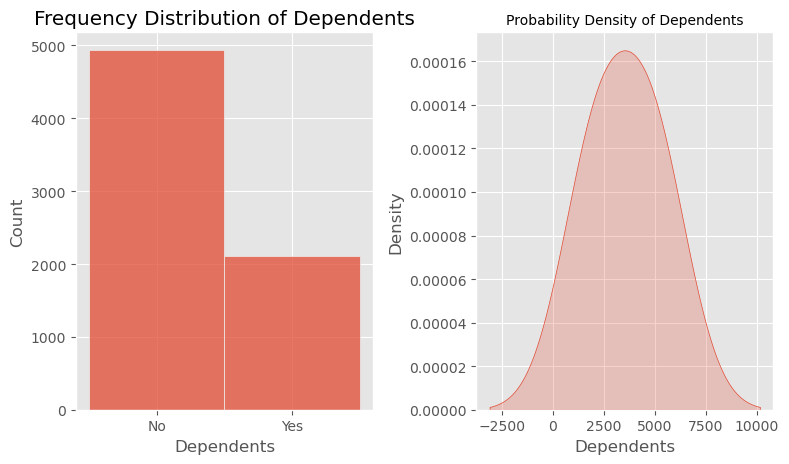


---------------
FEATURE: TENURE
---------------


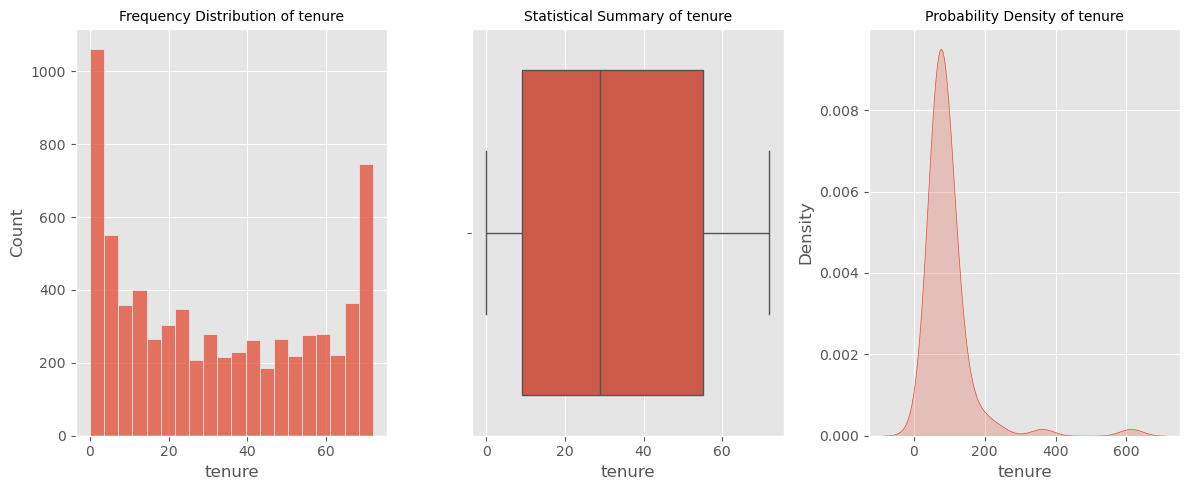


---------------
FEATURE: PHONESERVICE
---------------


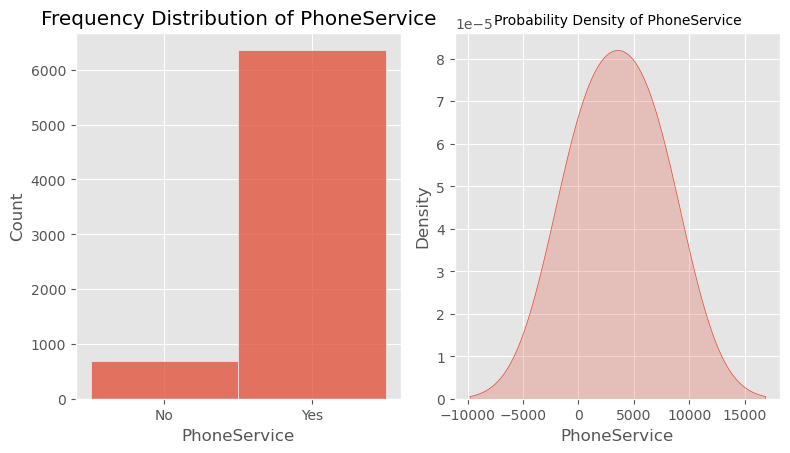


---------------
FEATURE: MULTIPLELINES
---------------


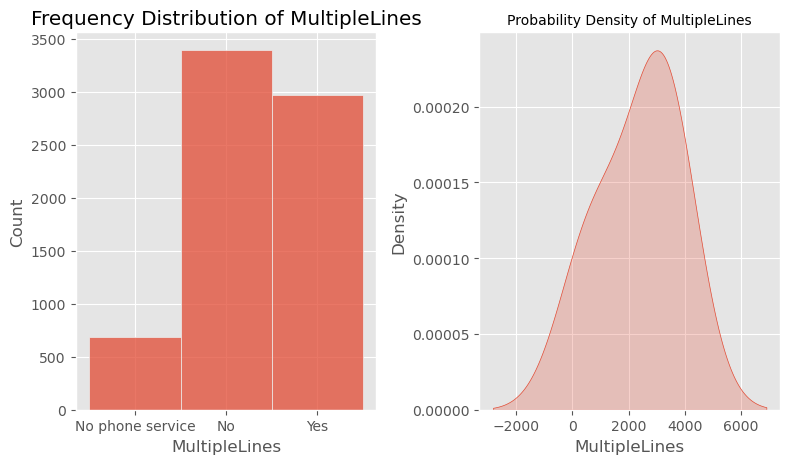


---------------
FEATURE: INTERNETSERVICE
---------------


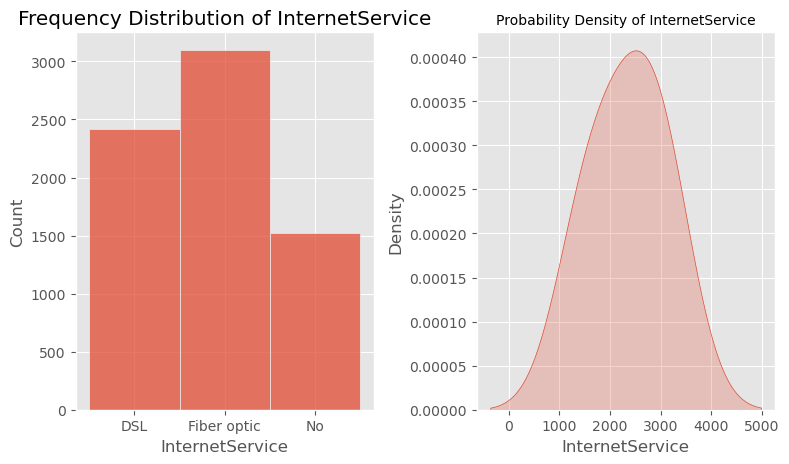


---------------
FEATURE: ONLINESECURITY
---------------


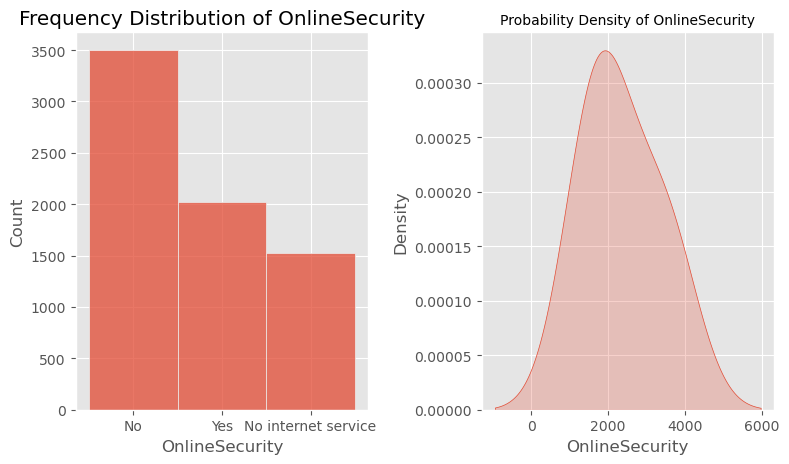


---------------
FEATURE: ONLINEBACKUP
---------------


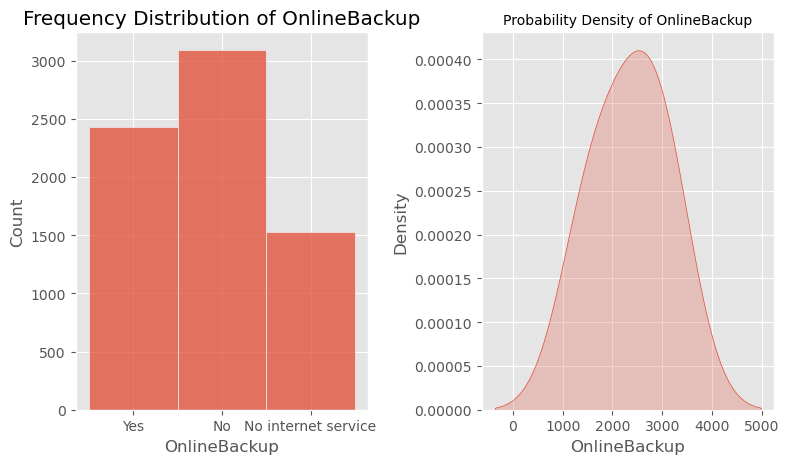


---------------
FEATURE: DEVICEPROTECTION
---------------


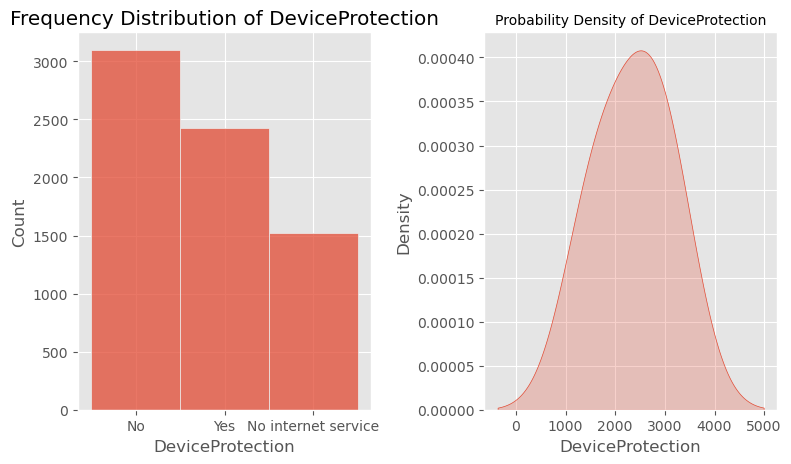


---------------
FEATURE: TECHSUPPORT
---------------


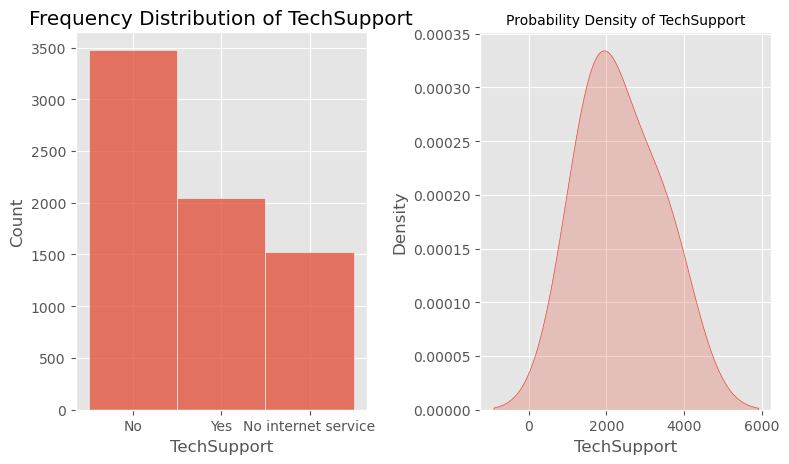


---------------
FEATURE: STREAMINGTV
---------------


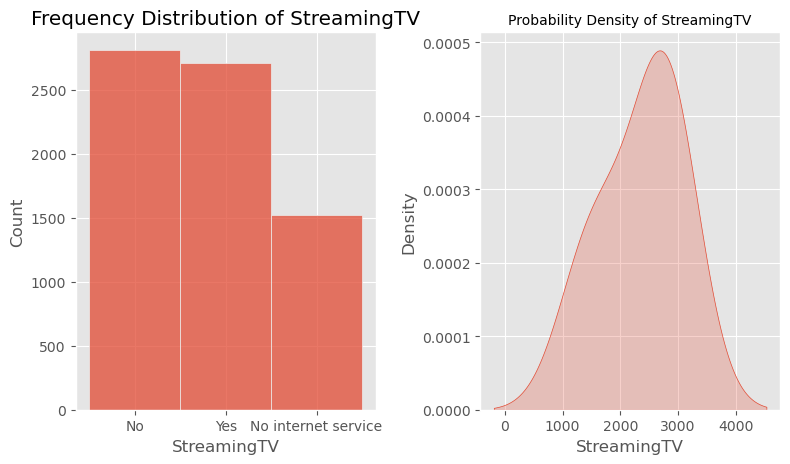


---------------
FEATURE: STREAMINGMOVIES
---------------


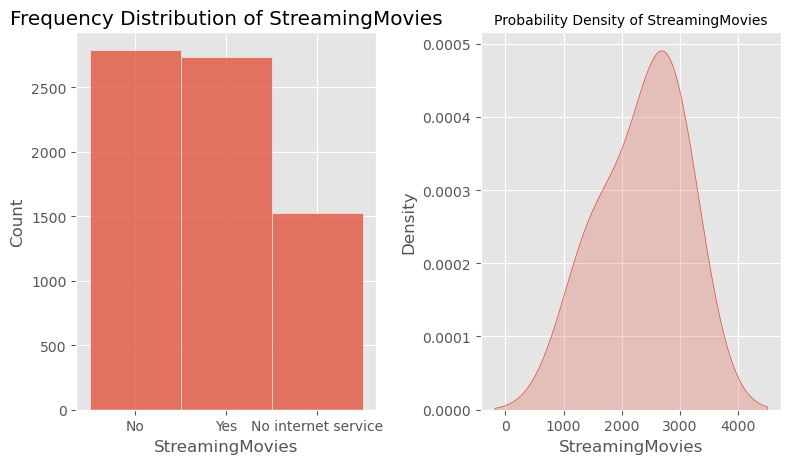


---------------
FEATURE: CONTRACT
---------------


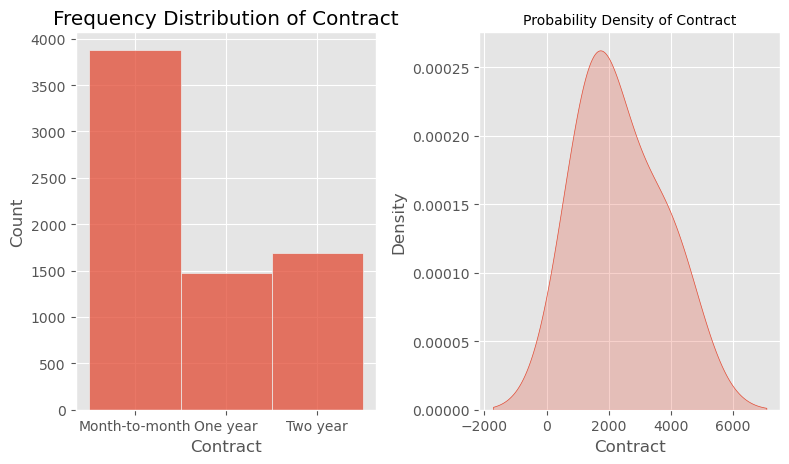


---------------
FEATURE: MONTHLYCHARGES
---------------


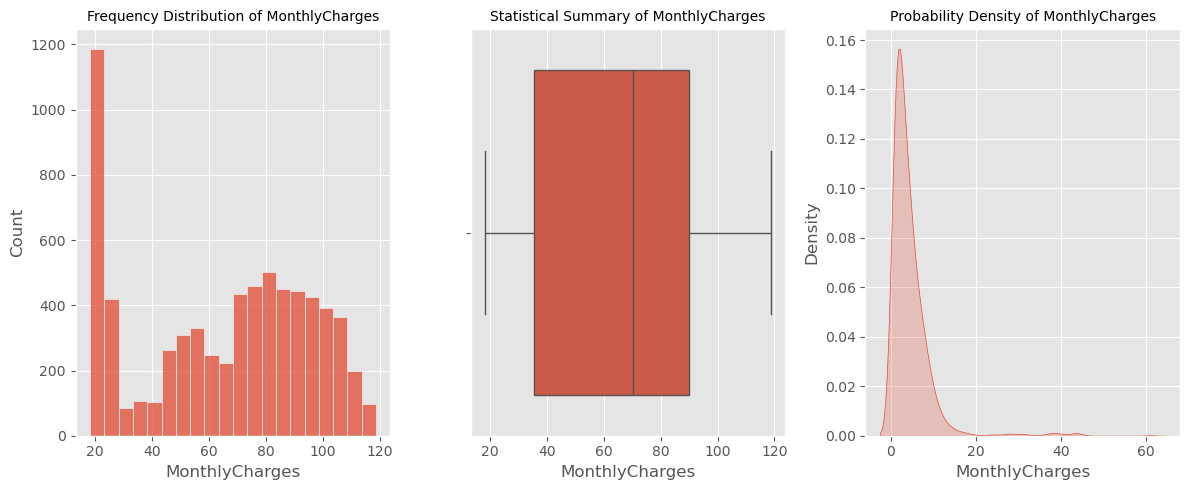


---------------
FEATURE: CHURN
---------------


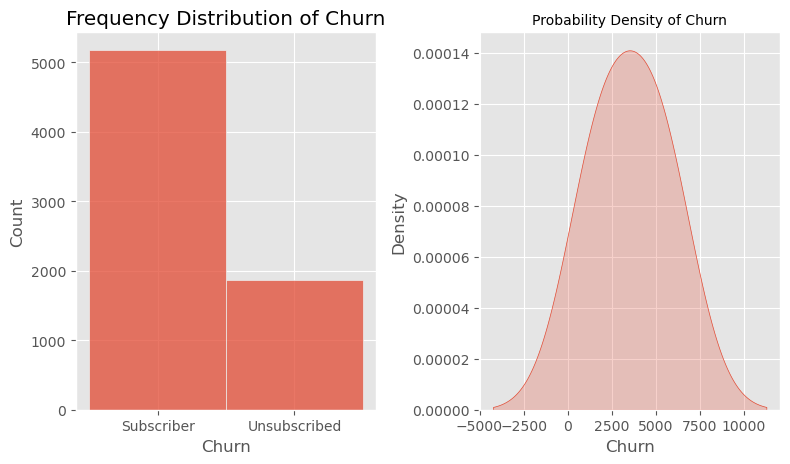

In [2]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    if len(df[column].unique()) > 4:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)
        
        sns.boxplot(ax=ax2, x=df[column])
        ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
        ax2.set_xlabel(column)

        sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
        ax3.set_title(f'Probability Density of {column}', fontsize=10)
        ax3.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()
    else:
        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,5))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}')
        ax1.set_xlabel(column)

        sns.kdeplot(ax=ax2, data=df[column].value_counts(), shade=True)
        ax2.set_title(f'Probability Density of {column}', fontsize=10)
        ax2.set_xlabel(column)

        plt.tight_layout(rect=[0,0,1,0.95])
        plt.show()

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Groupby Comparisons

### Scatterplot of Target Feature

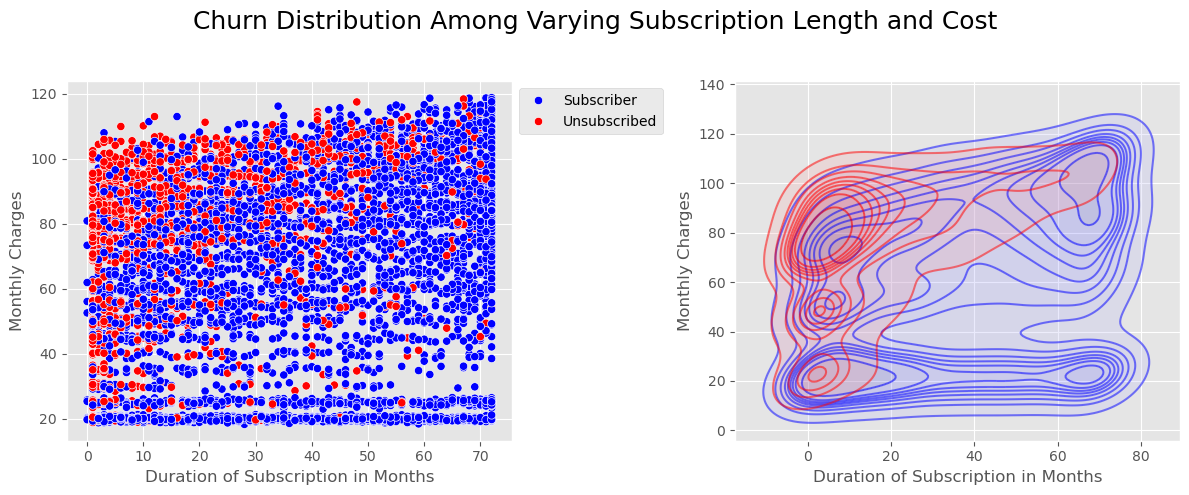

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plt.suptitle('Churn Distribution Among Varying Subscription Length and Cost', fontsize=18)
sns.scatterplot(ax=ax1, data=df, x='tenure', y='MonthlyCharges', hue='Churn', \
                palette={'Subscriber': 'blue', 'Unsubscribed':'red'})
ax1.set_xlabel('Duration of Subscription in Months')
ax1.set_ylabel('Monthly Charges')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')

sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', fill=True, alpha=0.25, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, legend=False)
sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, alpha=0.5, linewidth=1)
ax2.set_xlabel('Duration of Subscription in Months')
ax2.set_ylabel('Monthly Charges')

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### Correlation Plots

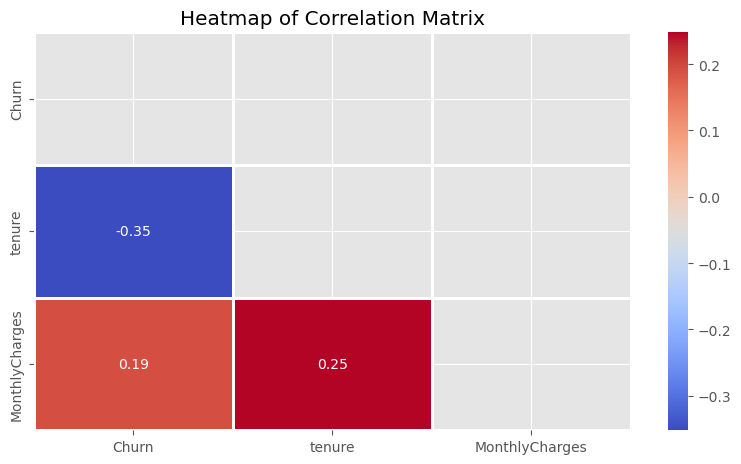

In [4]:
df_ordinal = df[['Churn','tenure','MonthlyCharges']]
df_ordinal['Churn'] = df['Churn'].str.strip().replace('Subscriber',0).replace('Unsubscribed',1)
correlation_matrix = df_ordinal.corr()

fig, ax = plt.subplots(1, figsize=(8,5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=2)
ax.set_title('Heatmap of Correlation Matrix')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

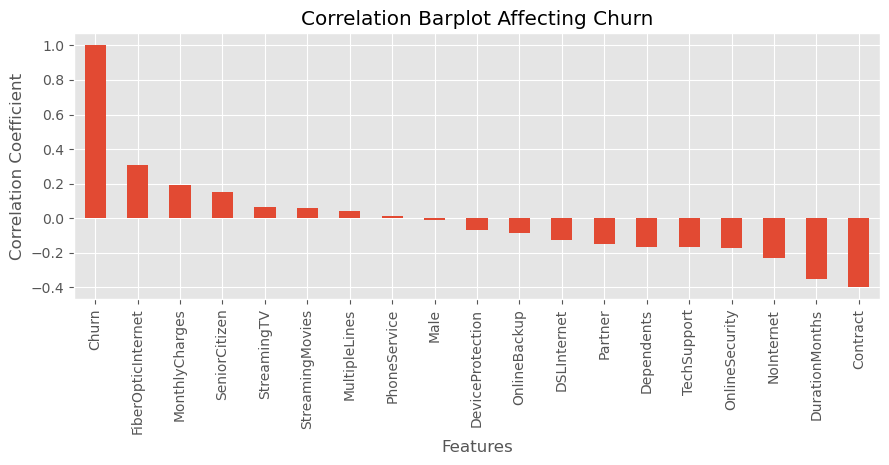

In [5]:
df_encoded = pd.read_csv('../data/encoded_telco_churn.csv')
df_encoded['Contract'] = df_encoded['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_encoded.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.title('Correlation Barplot Affecting Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### Pairplot Relationships

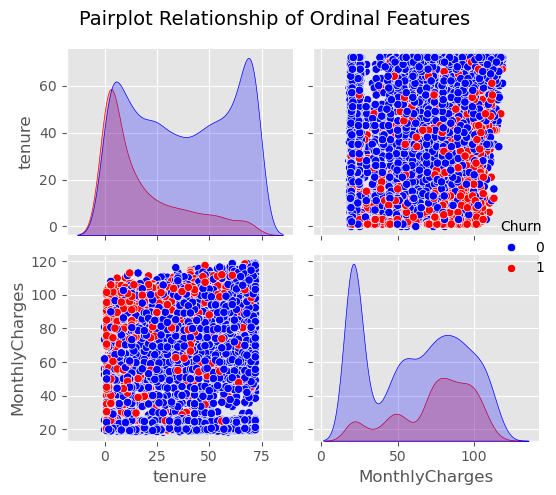

In [6]:
sns.pairplot(data=df_ordinal, hue='Churn', palette={0:'blue', 1:'red'})
plt.suptitle('Pairplot Relationship of Ordinal Features', fontsize=14)
plt.tight_layout()
plt.show()

### Groupby Comparisons

We group by `nominal data` because we want to differentiate churn by different variables.

In [7]:
df_nominal = df[[
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'Churn']]

#### Groupby `Churn`

By grouping our features by Churn, we can now see how the churn distribution differentiates between various values of our features.


---------------
FEATURE: GENDER
---------------


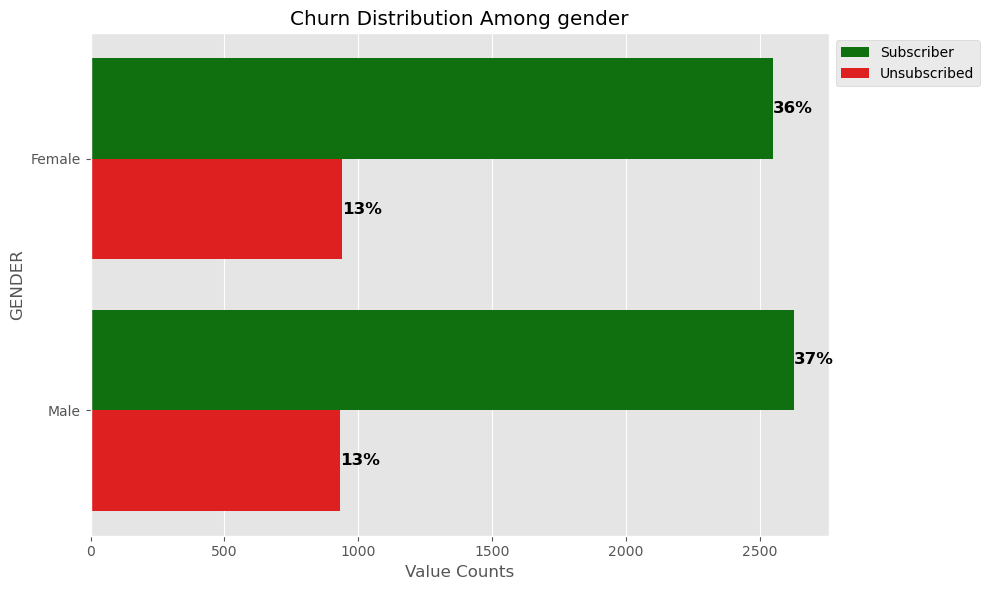


---------------
FEATURE: SENIORCITIZEN
---------------


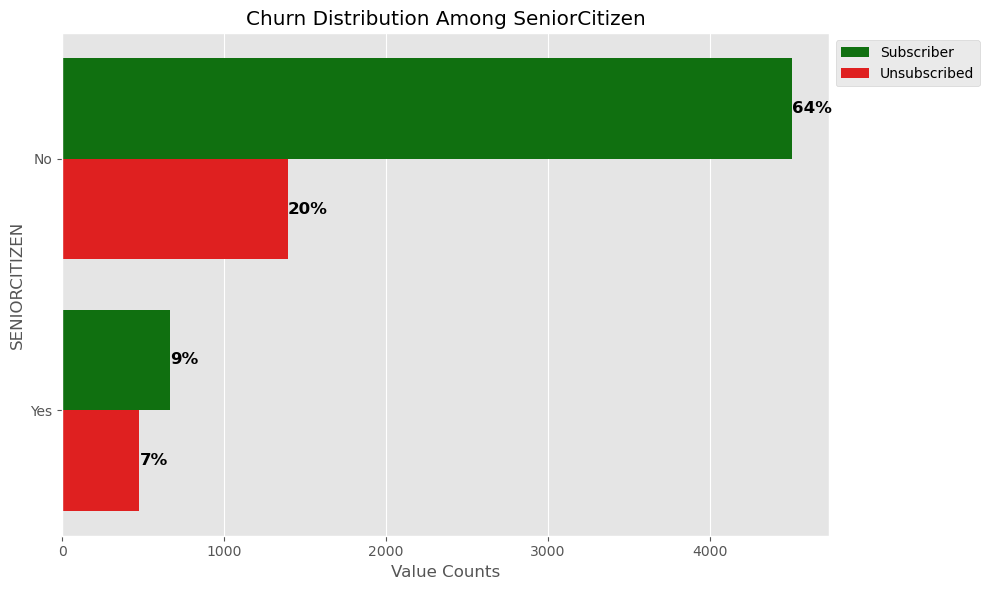


---------------
FEATURE: PARTNER
---------------


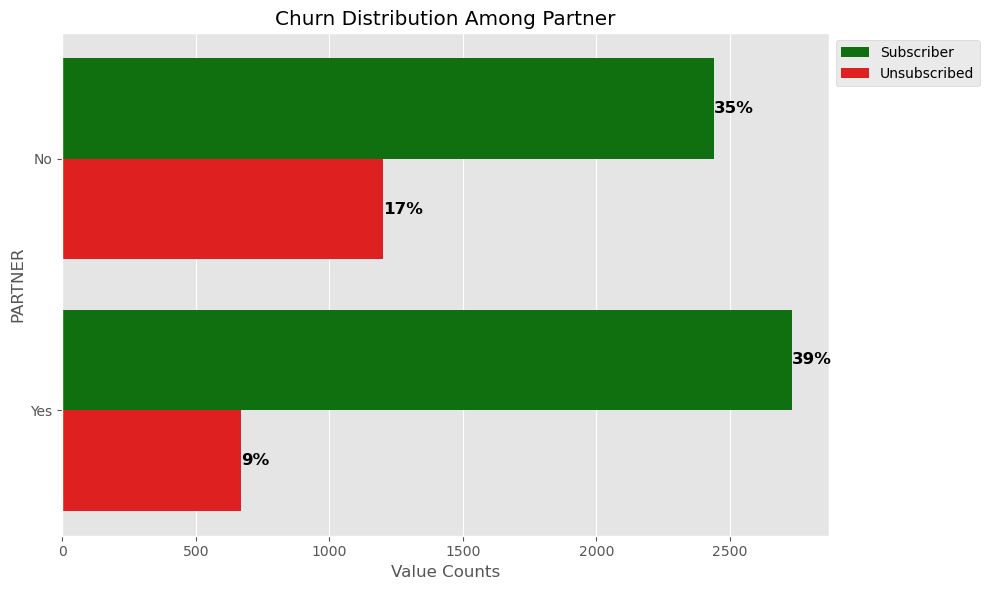


---------------
FEATURE: DEPENDENTS
---------------


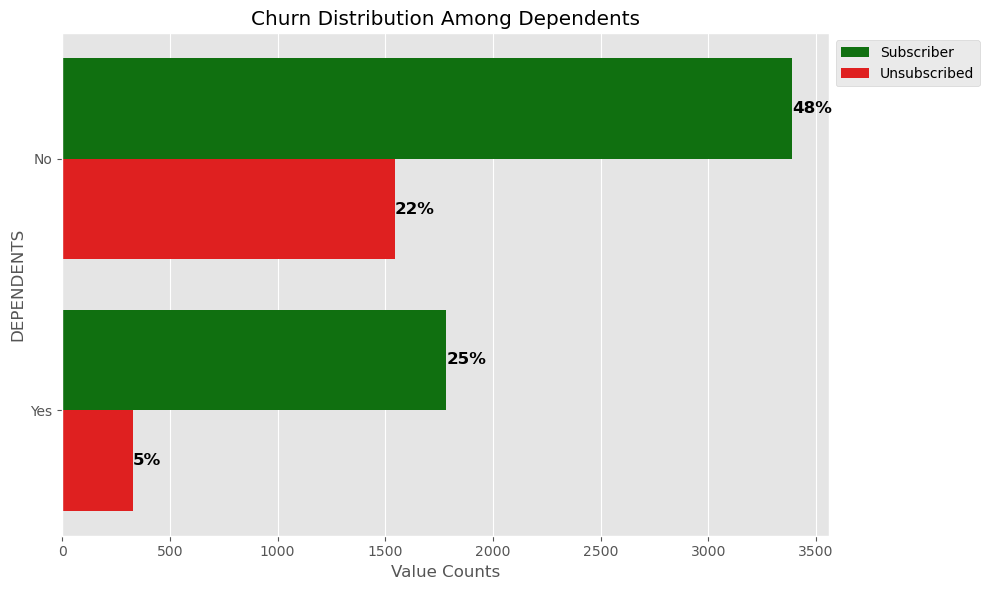


---------------
FEATURE: PHONESERVICE
---------------


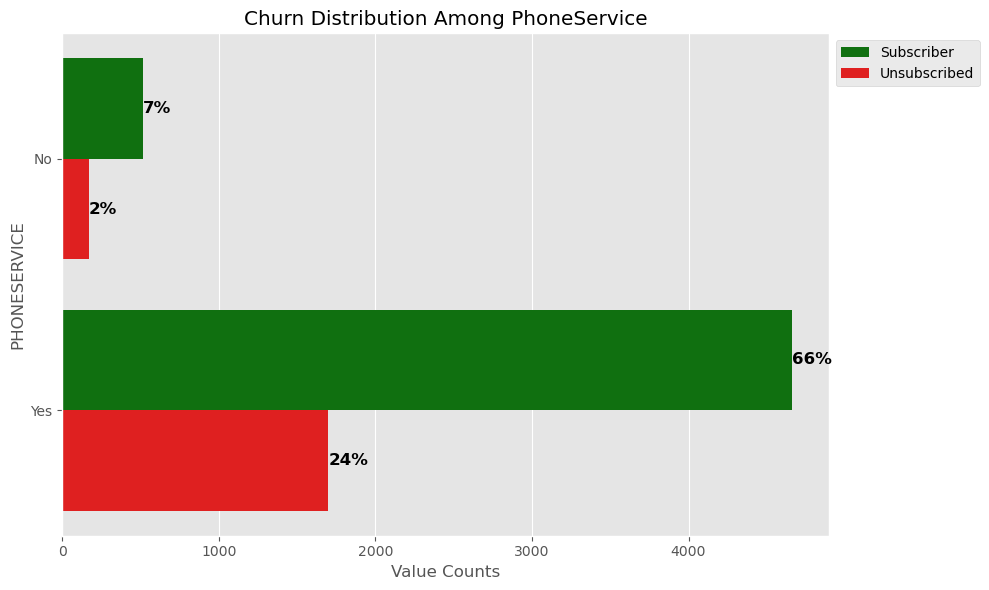


---------------
FEATURE: MULTIPLELINES
---------------


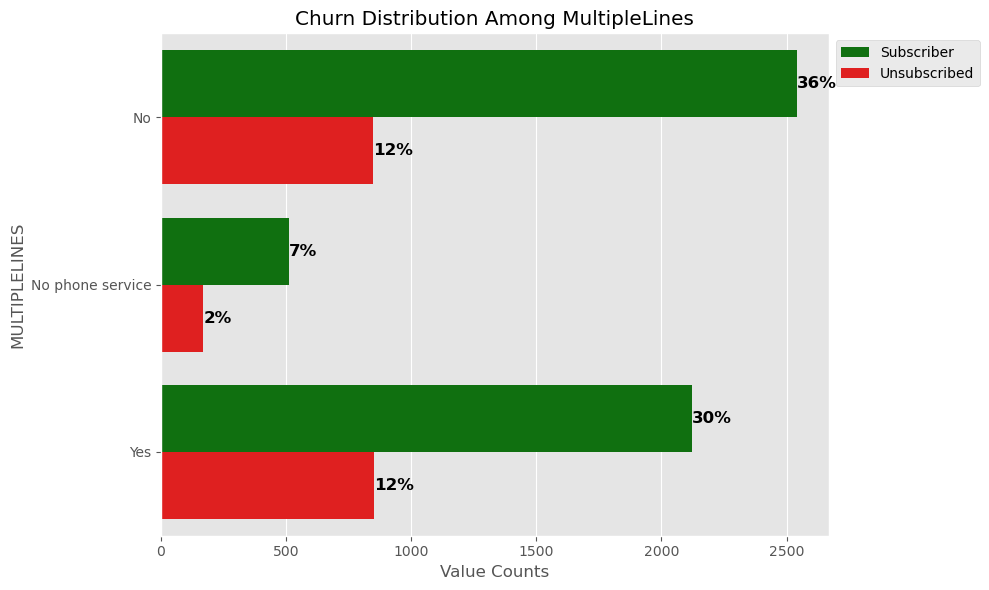


---------------
FEATURE: INTERNETSERVICE
---------------


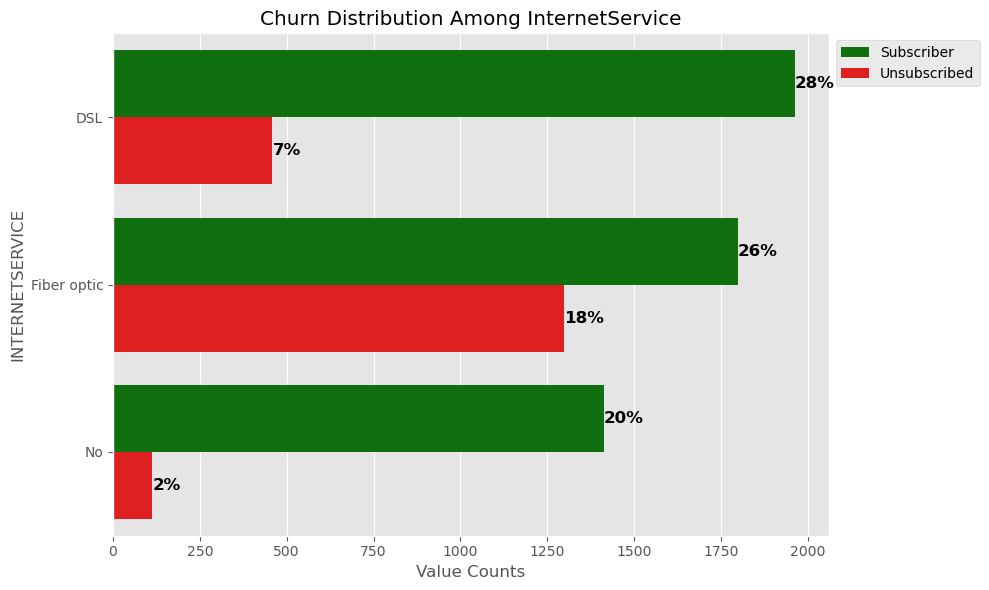


---------------
FEATURE: ONLINESECURITY
---------------


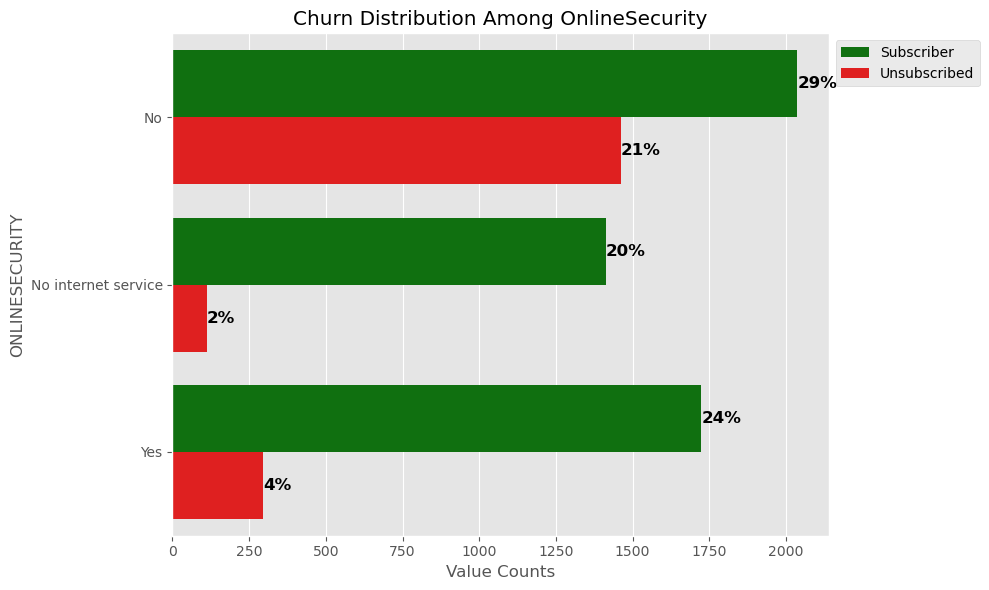


---------------
FEATURE: ONLINEBACKUP
---------------


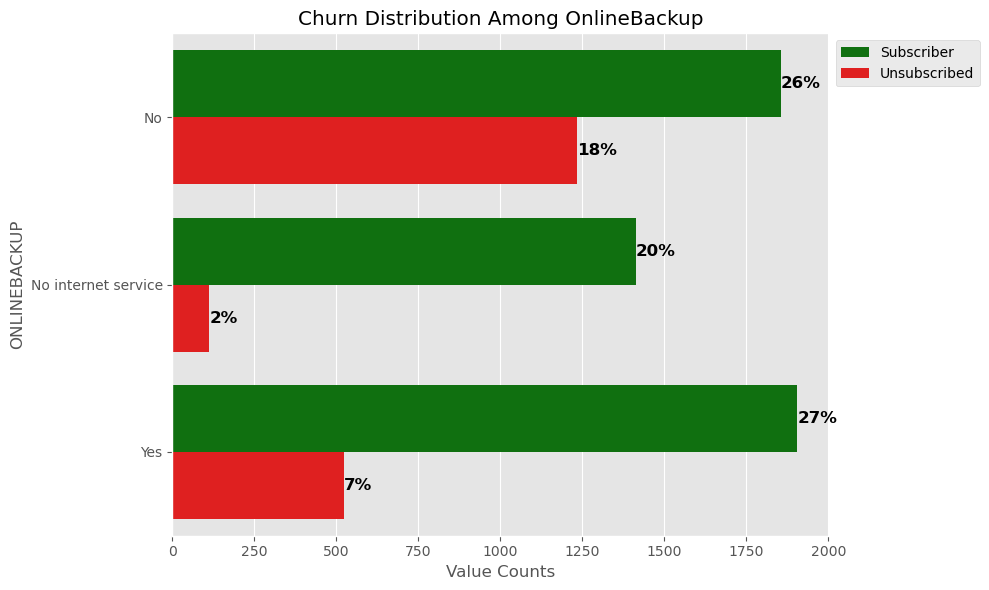


---------------
FEATURE: DEVICEPROTECTION
---------------


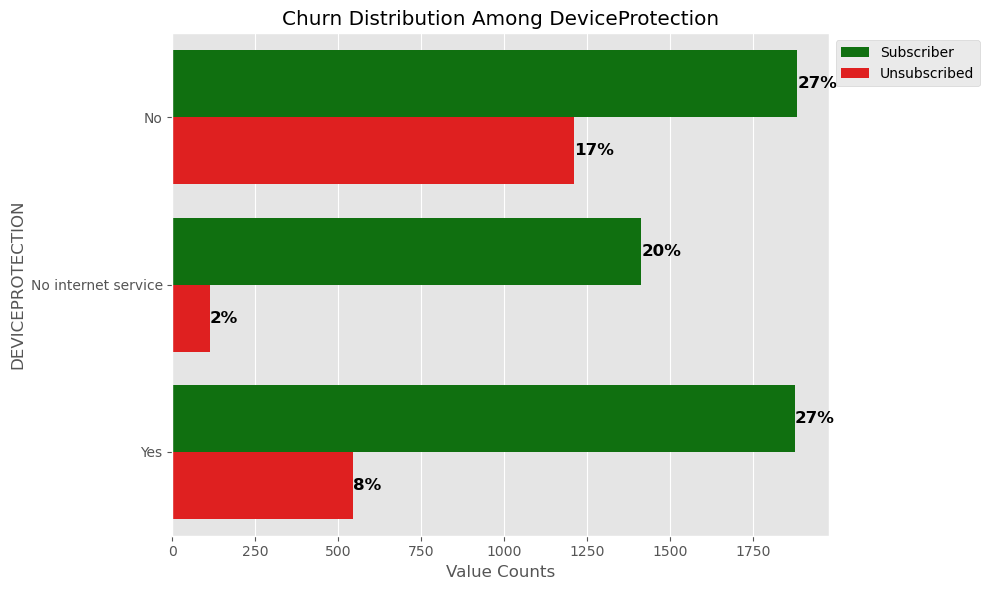


---------------
FEATURE: TECHSUPPORT
---------------


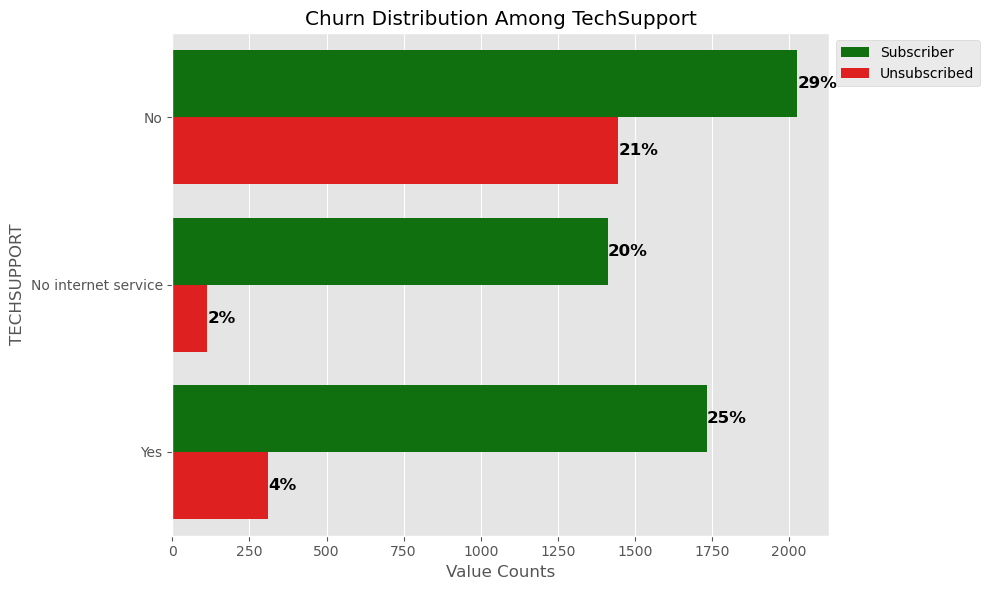


---------------
FEATURE: STREAMINGTV
---------------


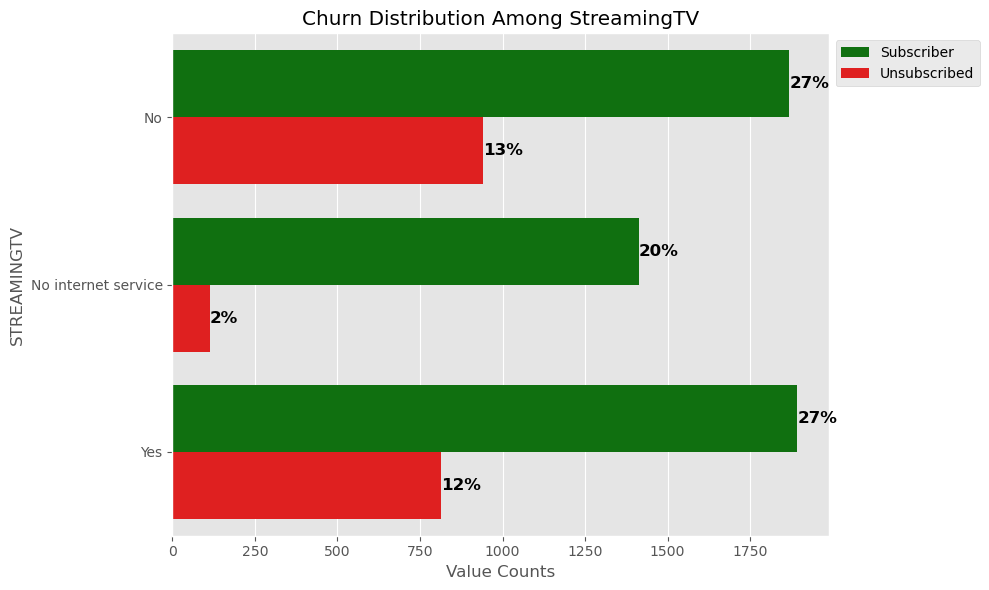


---------------
FEATURE: STREAMINGMOVIES
---------------


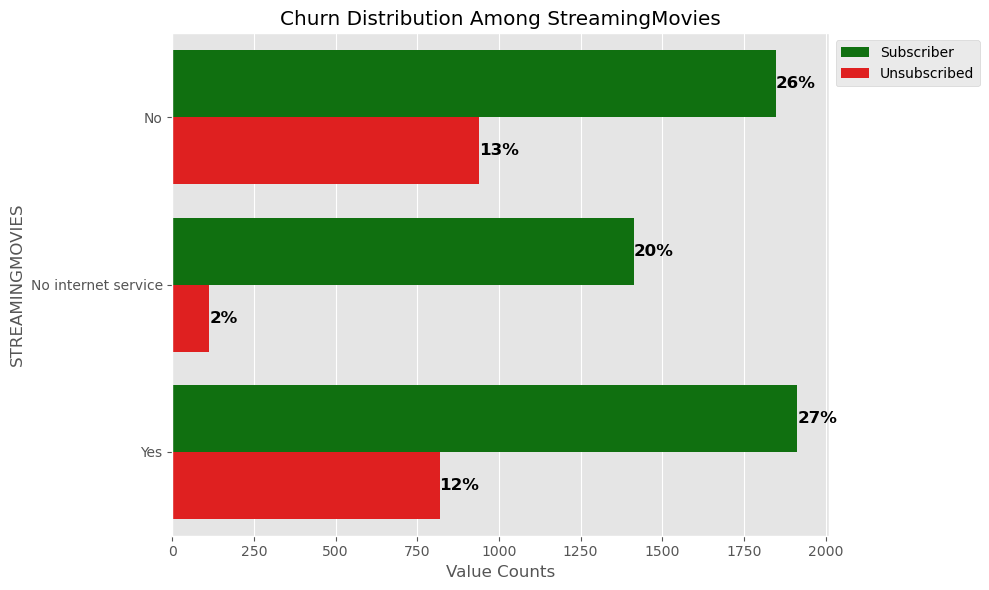


---------------
FEATURE: CONTRACT
---------------


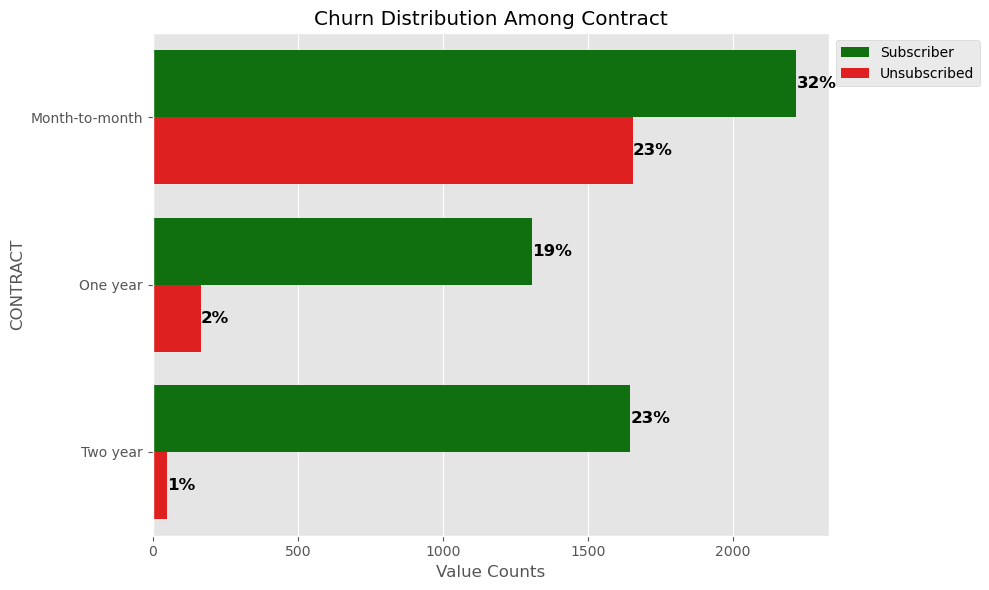

In [8]:
for column in df_nominal.columns:
    if column == 'Churn':
        break
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    def create_churn_plot(column):
        grouped = df_nominal.groupby(['Churn', column]).size().rename('count').reset_index()
        fig, ax = plt.subplots(1, figsize=(10, 6))
        sns.barplot(ax=ax, data=grouped, x='count', y=column, hue='Churn',
                    palette={'Subscriber': 'green', 'Unsubscribed': 'red'})
        ax.set_title(f'Churn Distribution Among {column}')
        ax.set_xlabel('Value Counts')
        ax.set_ylabel(column.upper())
        ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot
        for p in ax.patches:
            if p.get_width() > 0:
                percentage = p.get_width() / df_nominal[column].value_counts().sum() * 100
                ax.annotate(format(f'{percentage:.0f}%'),
                            (p.get_width(), p.get_y() + p.get_height() / 2.),
                            ha='left', va='center',
                            xytext=(0, 0),  # Adjust spacing
                            textcoords='offset points', fontweight='semibold', fontsize=12, color='black')

        plt.tight_layout()
        return plt.show()
    
    create_churn_plot(column)

#### Groupby `Add-ons`

- The various churn distribution among the values of our features show that `InternetService` has an irregular proportion of churn.
- But specific `Add-ons` like `OnlineSecurity`, `TechSupport`, `OnlineBackup`, and `DeviceProtection` appears to have less `Churn`.
- We will search for, who actually is subscribed to these various add-on services, and then look into those who have internet and how churn varies with these add-ons.

In [9]:
add_ons = ['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']


---------------
FEATURE: GENDER
---------------


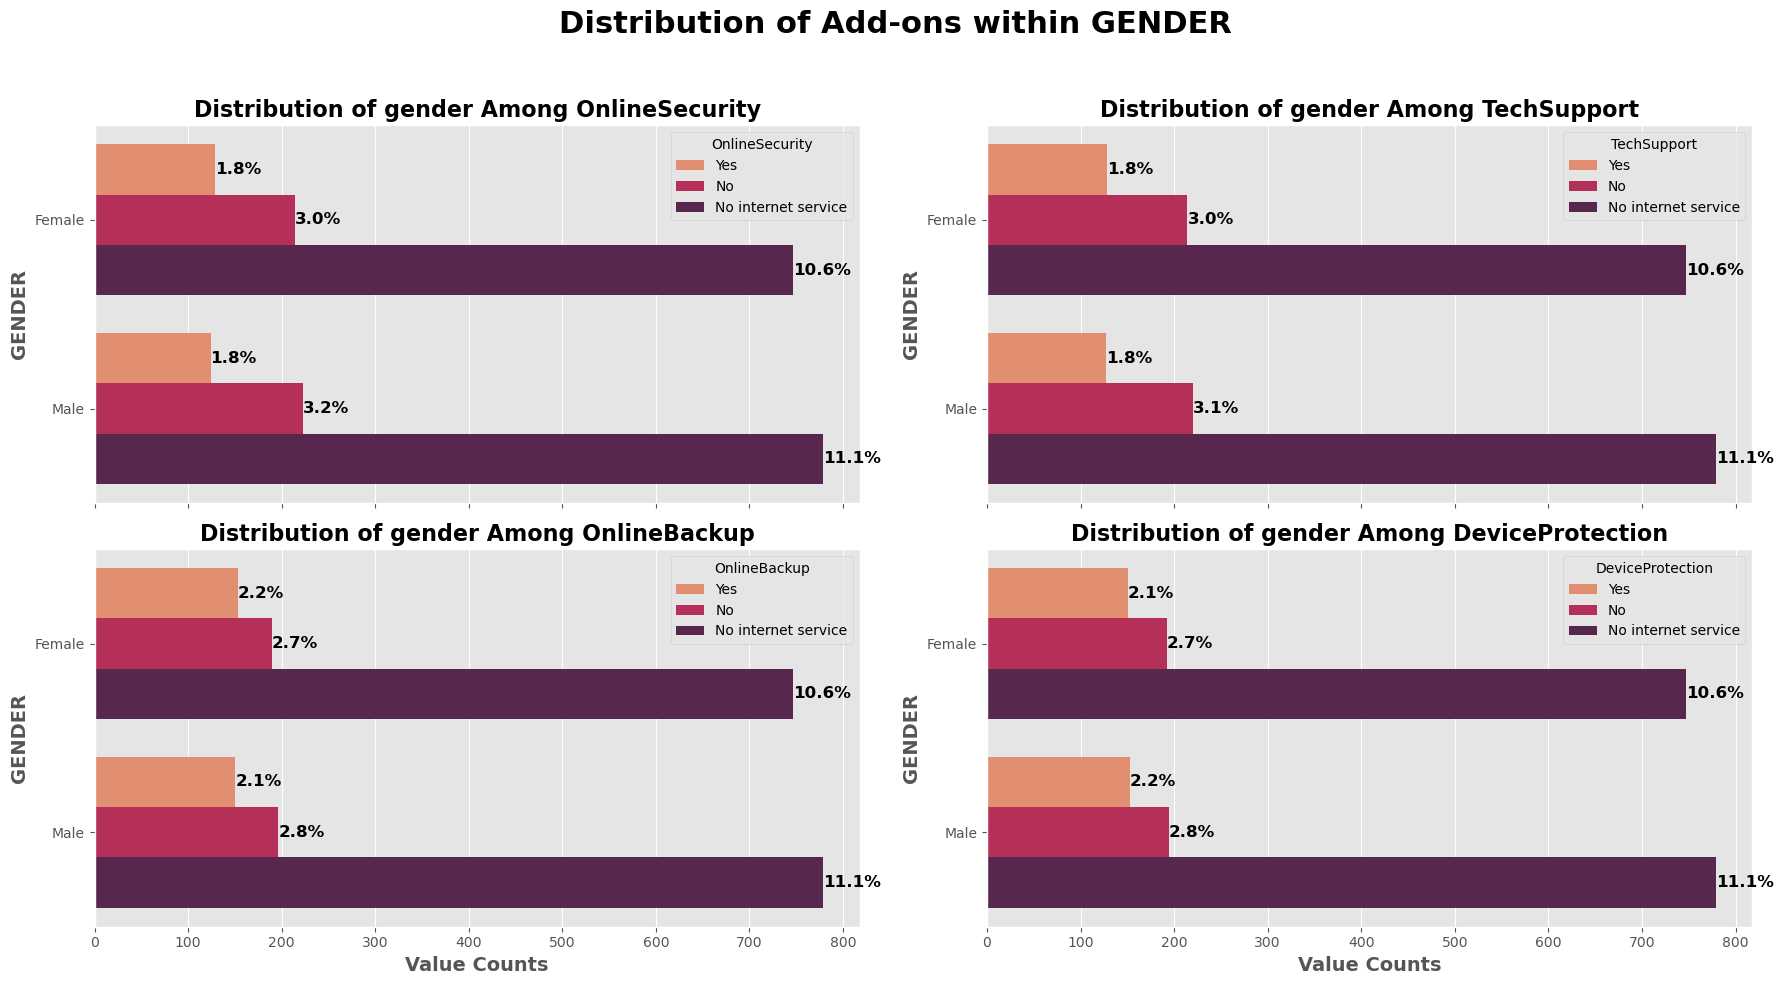


---------------
FEATURE: SENIORCITIZEN
---------------


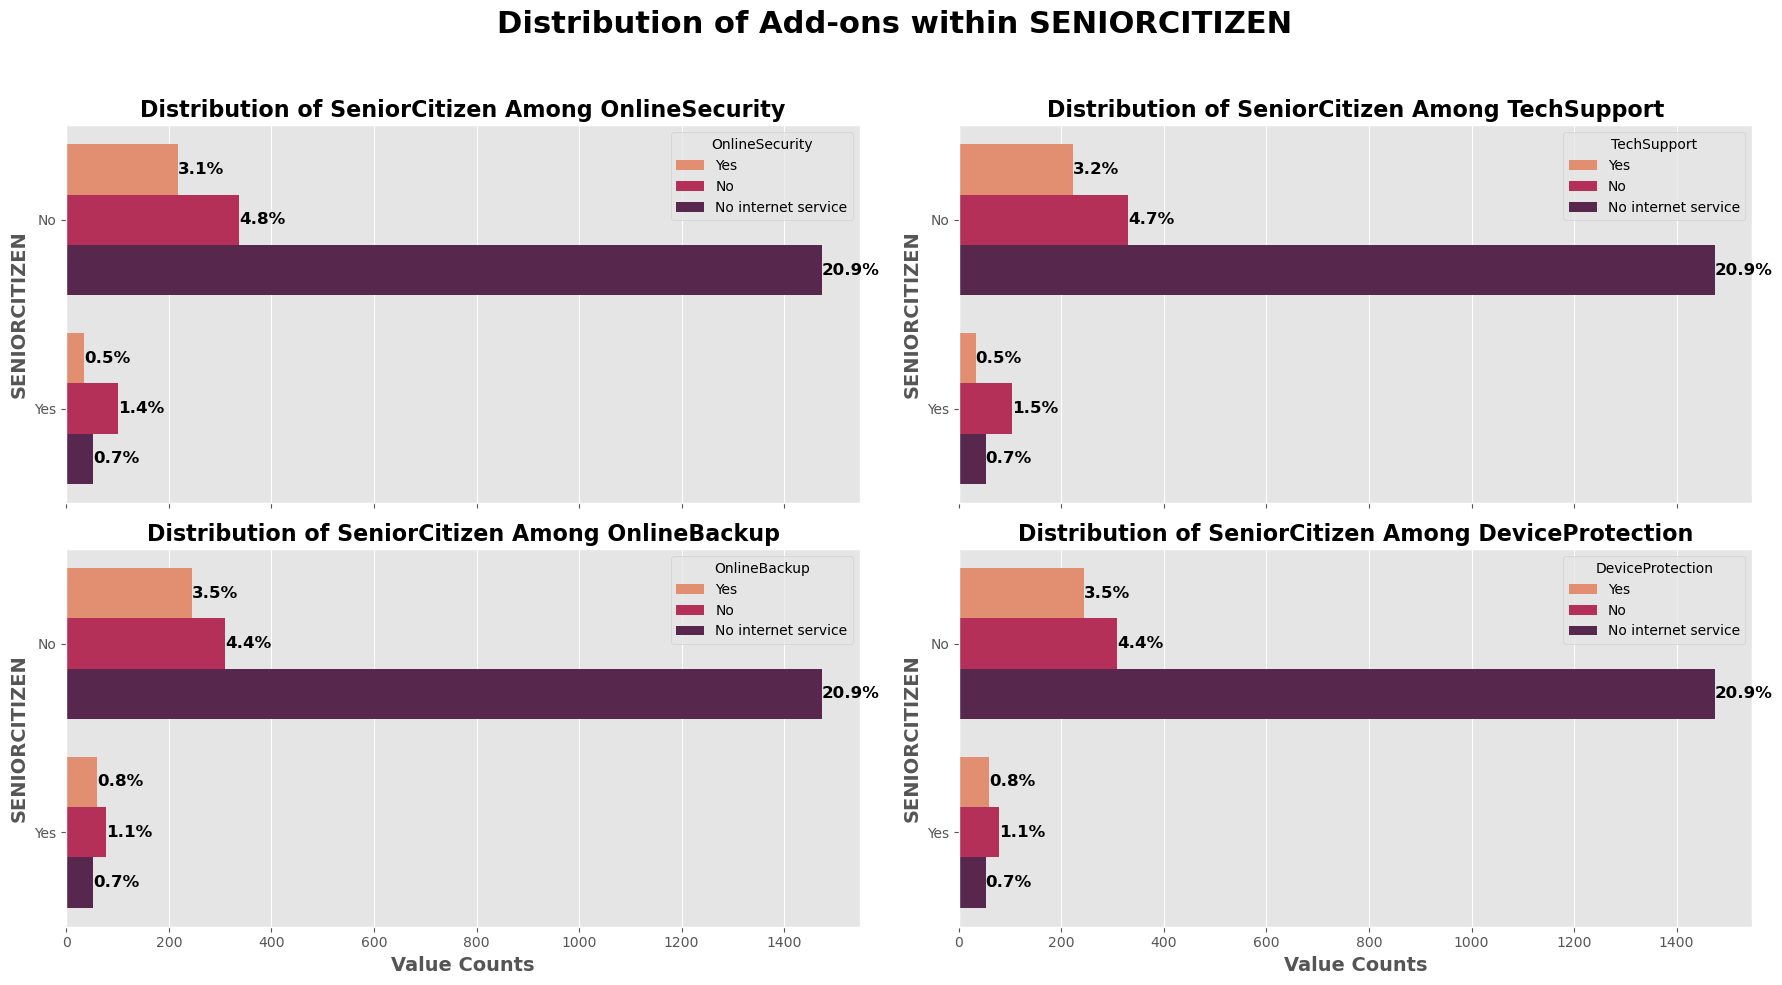


---------------
FEATURE: PARTNER
---------------


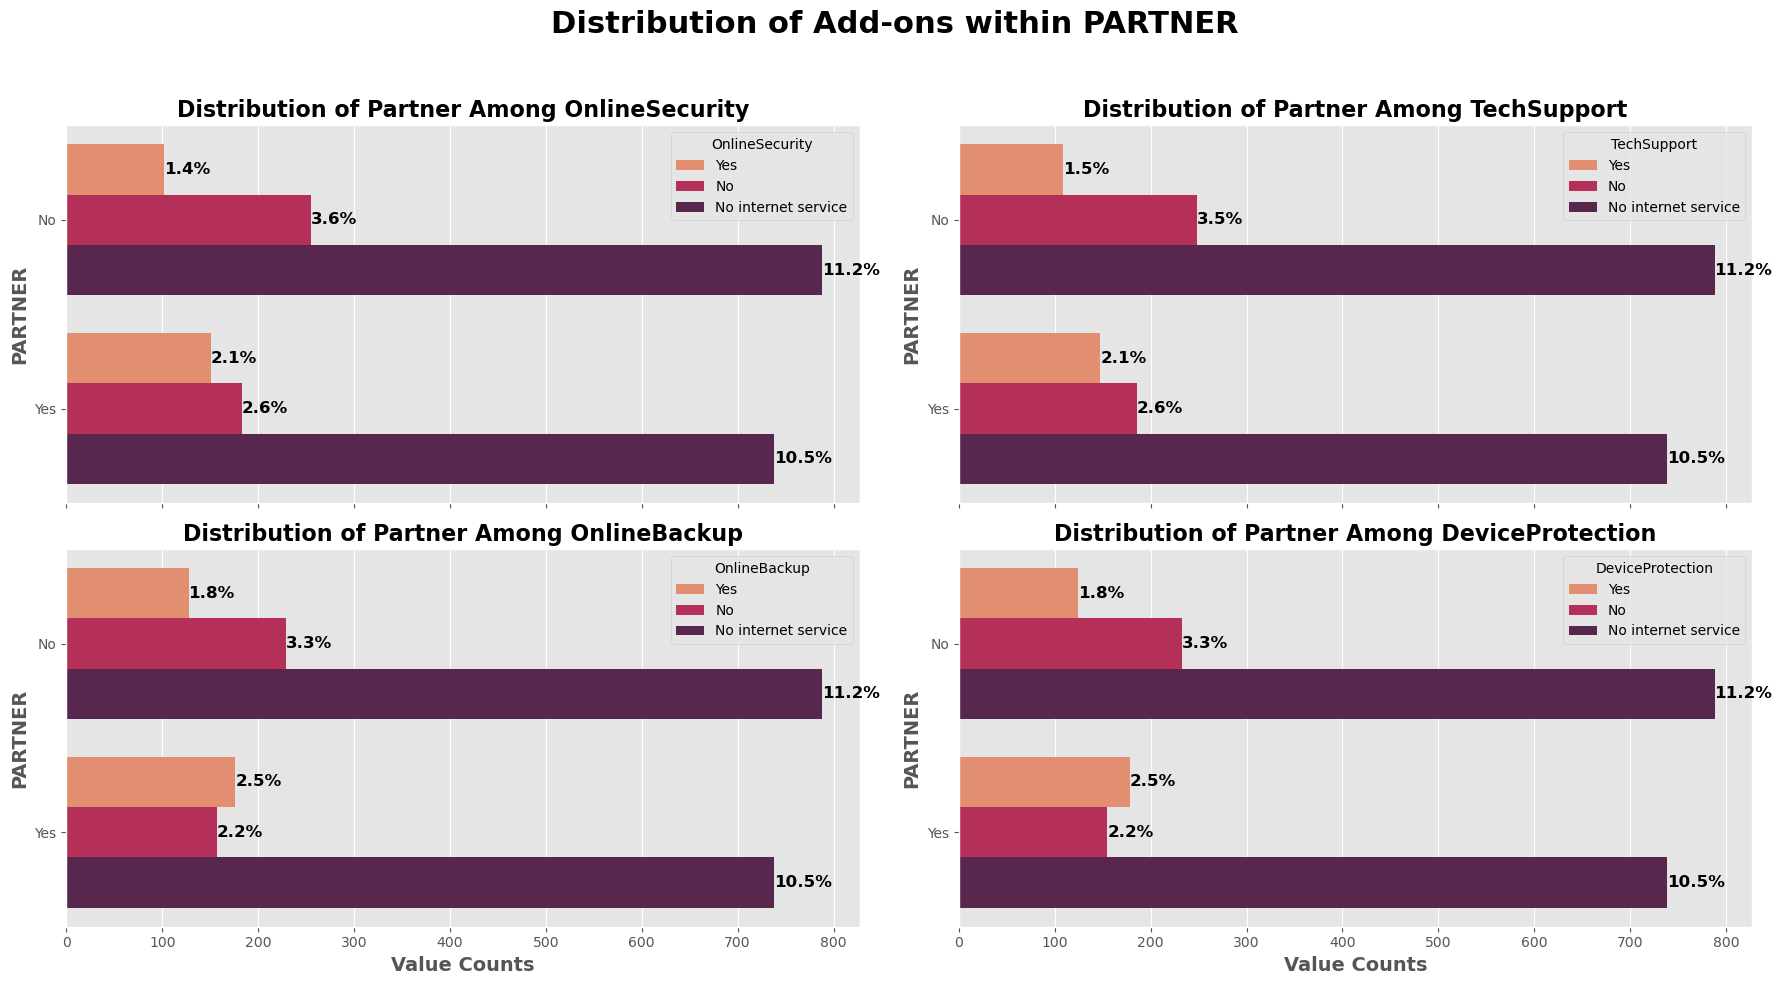


---------------
FEATURE: DEPENDENTS
---------------


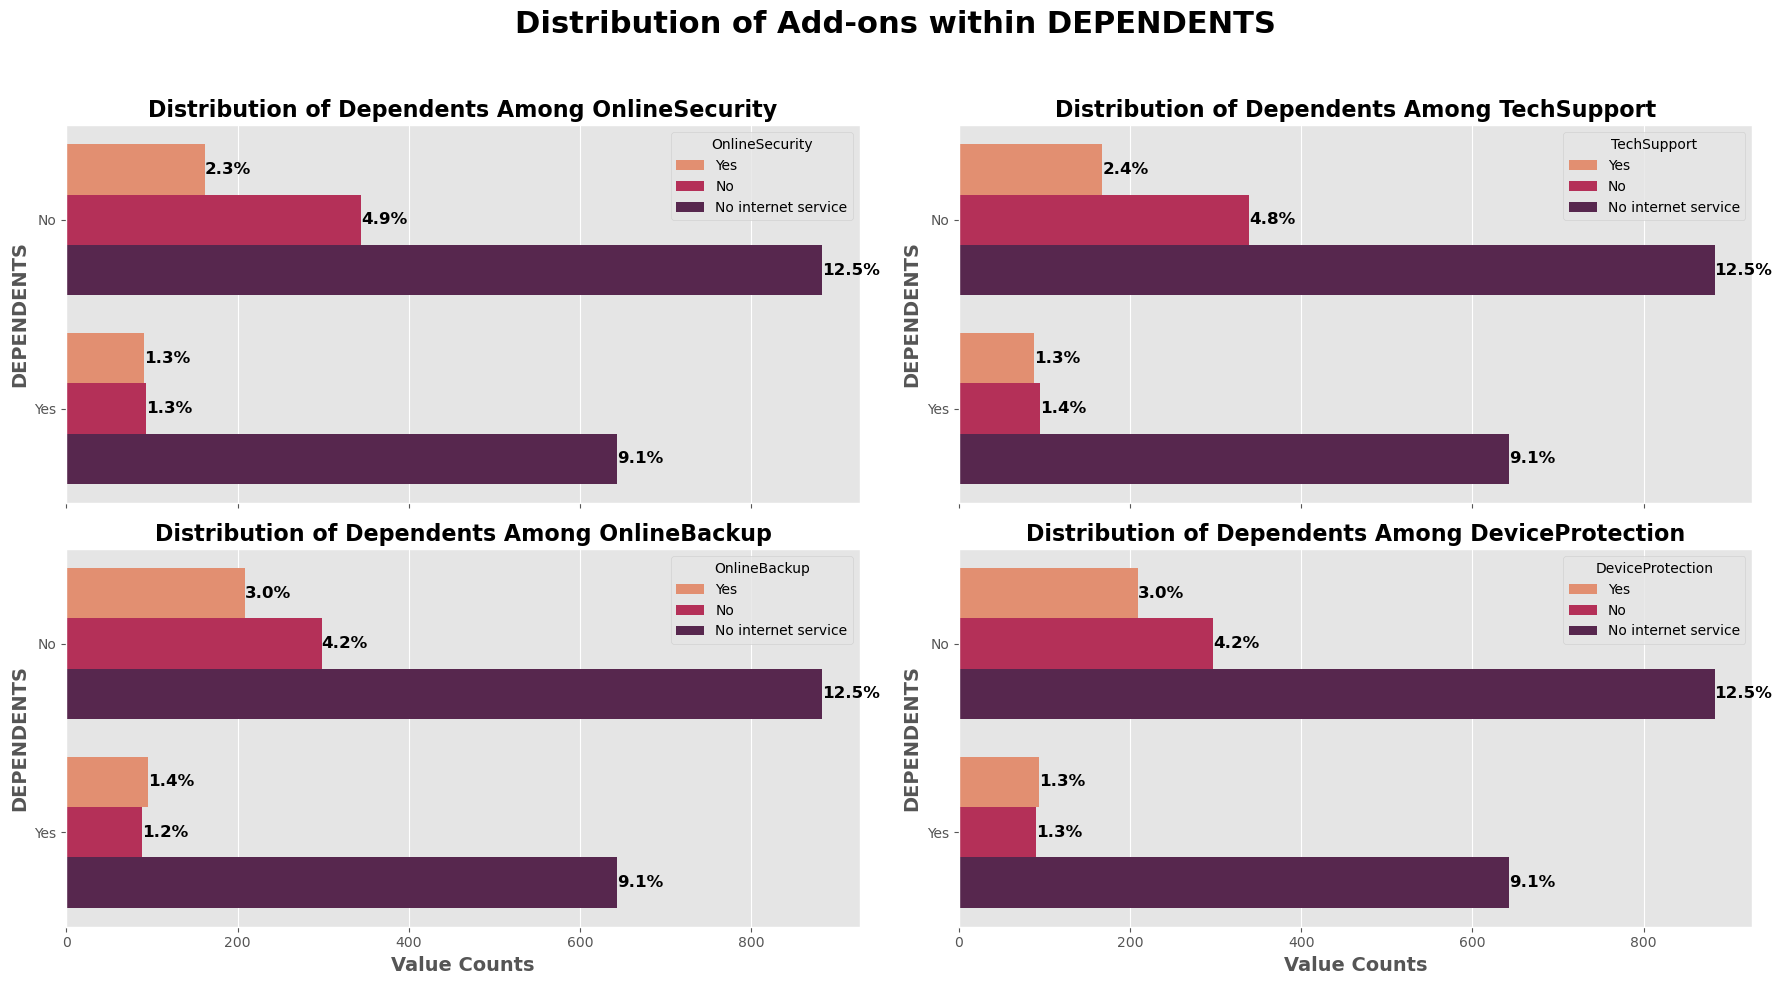


---------------
FEATURE: PHONESERVICE
---------------


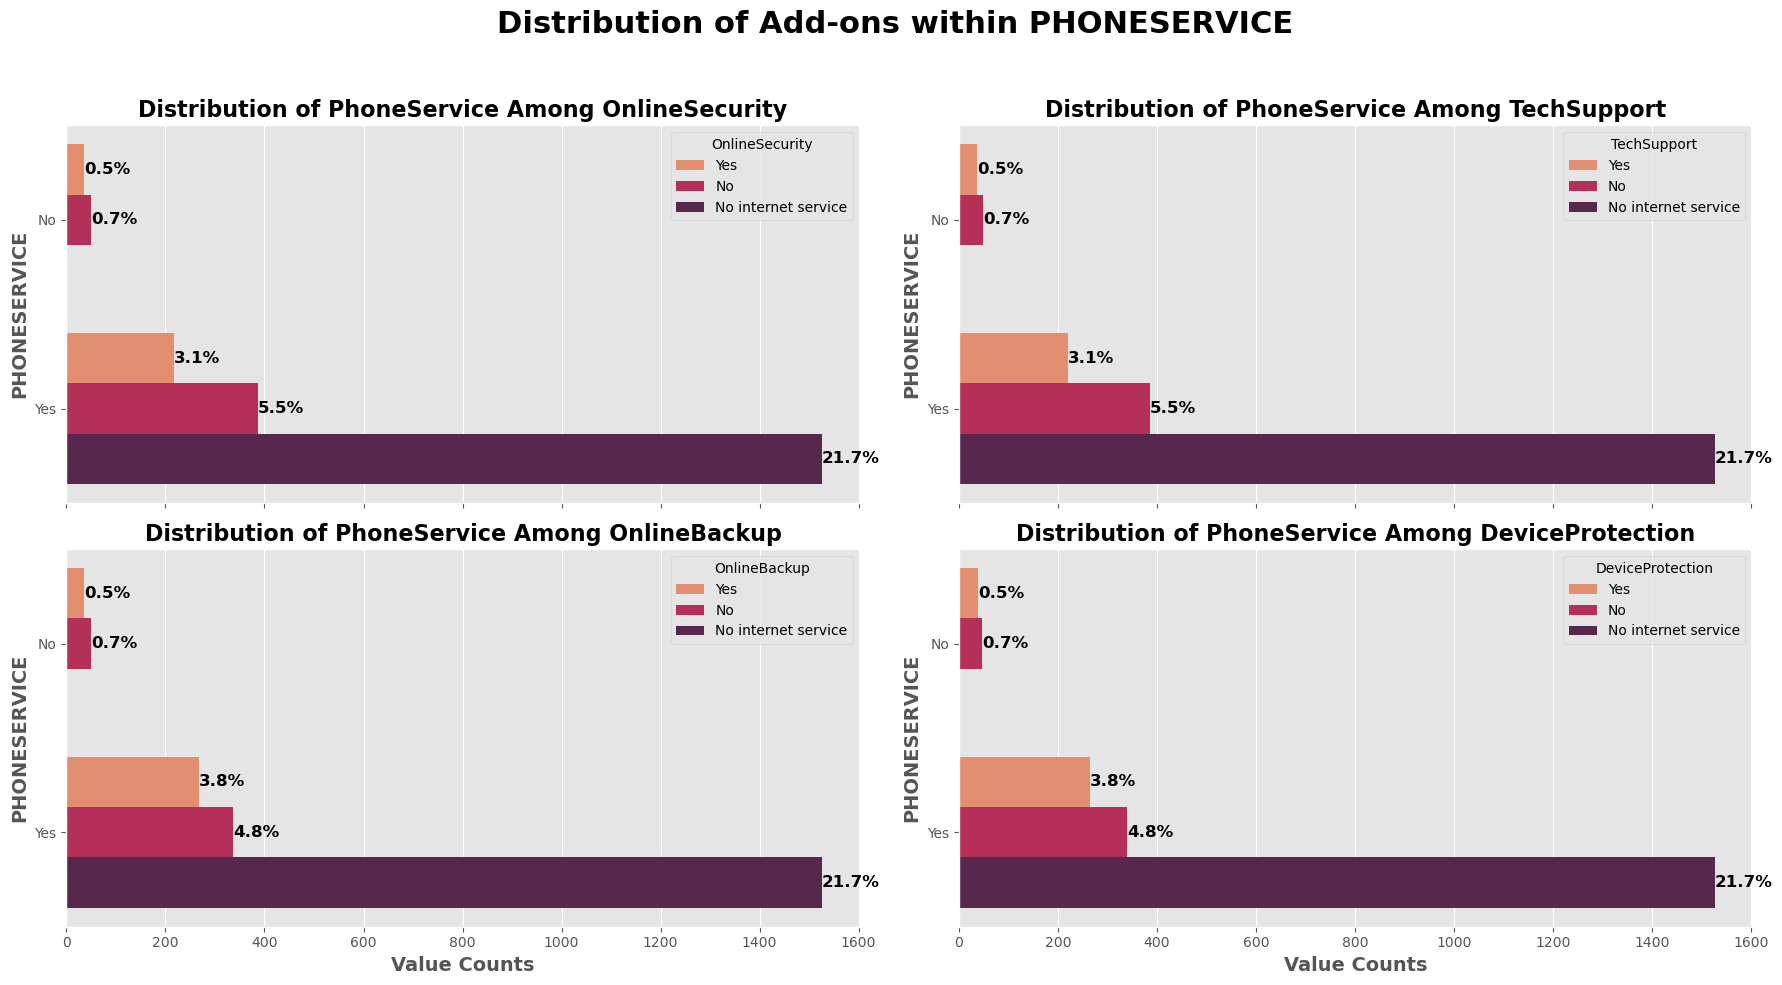


---------------
FEATURE: MULTIPLELINES
---------------


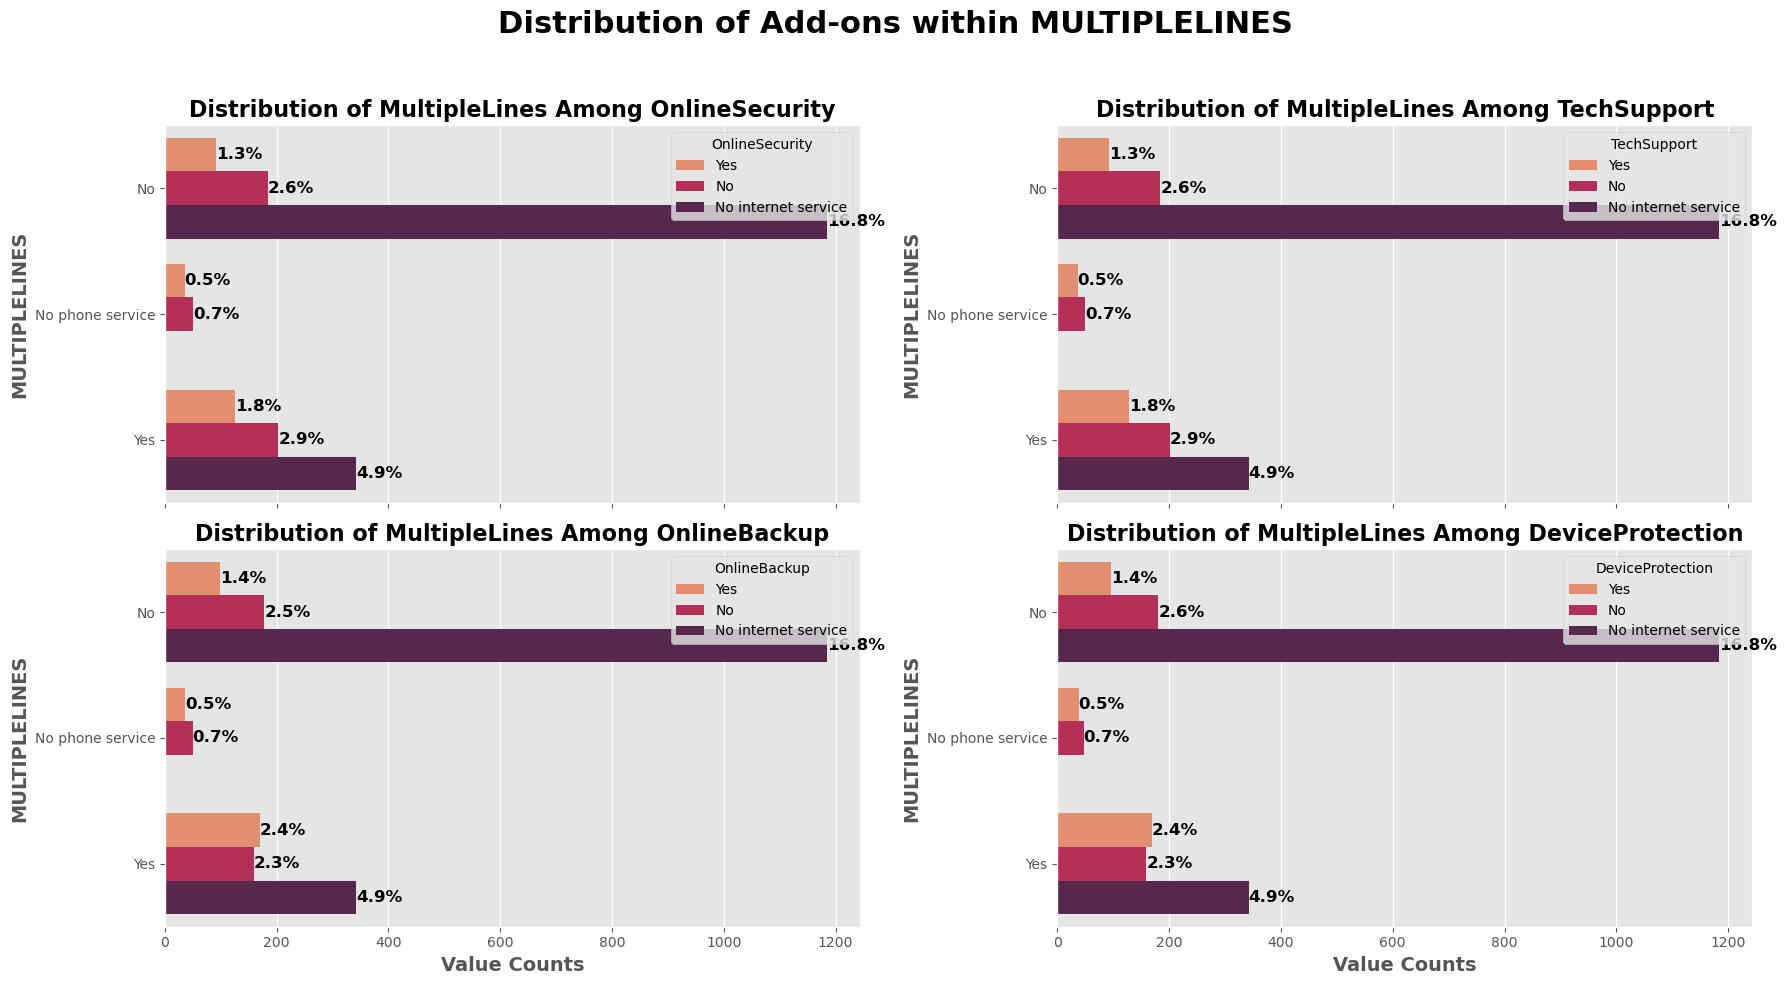


---------------
FEATURE: INTERNETSERVICE
---------------


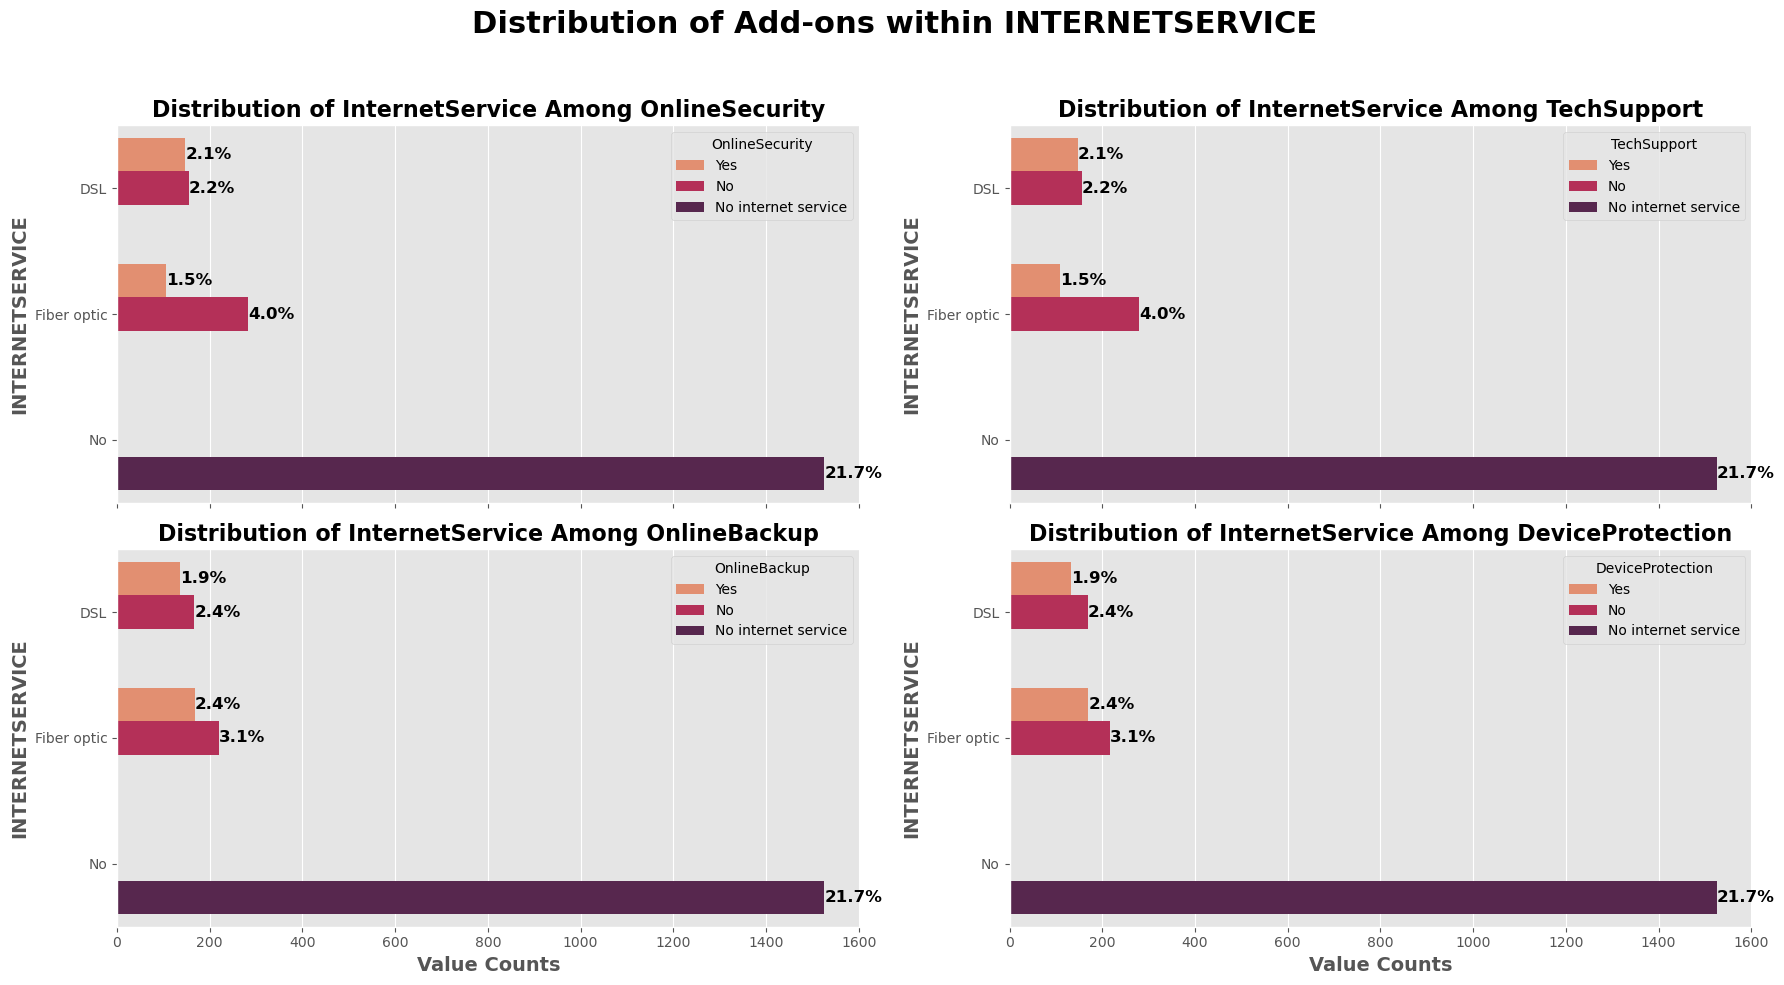


---------------
FEATURE: STREAMINGTV
---------------


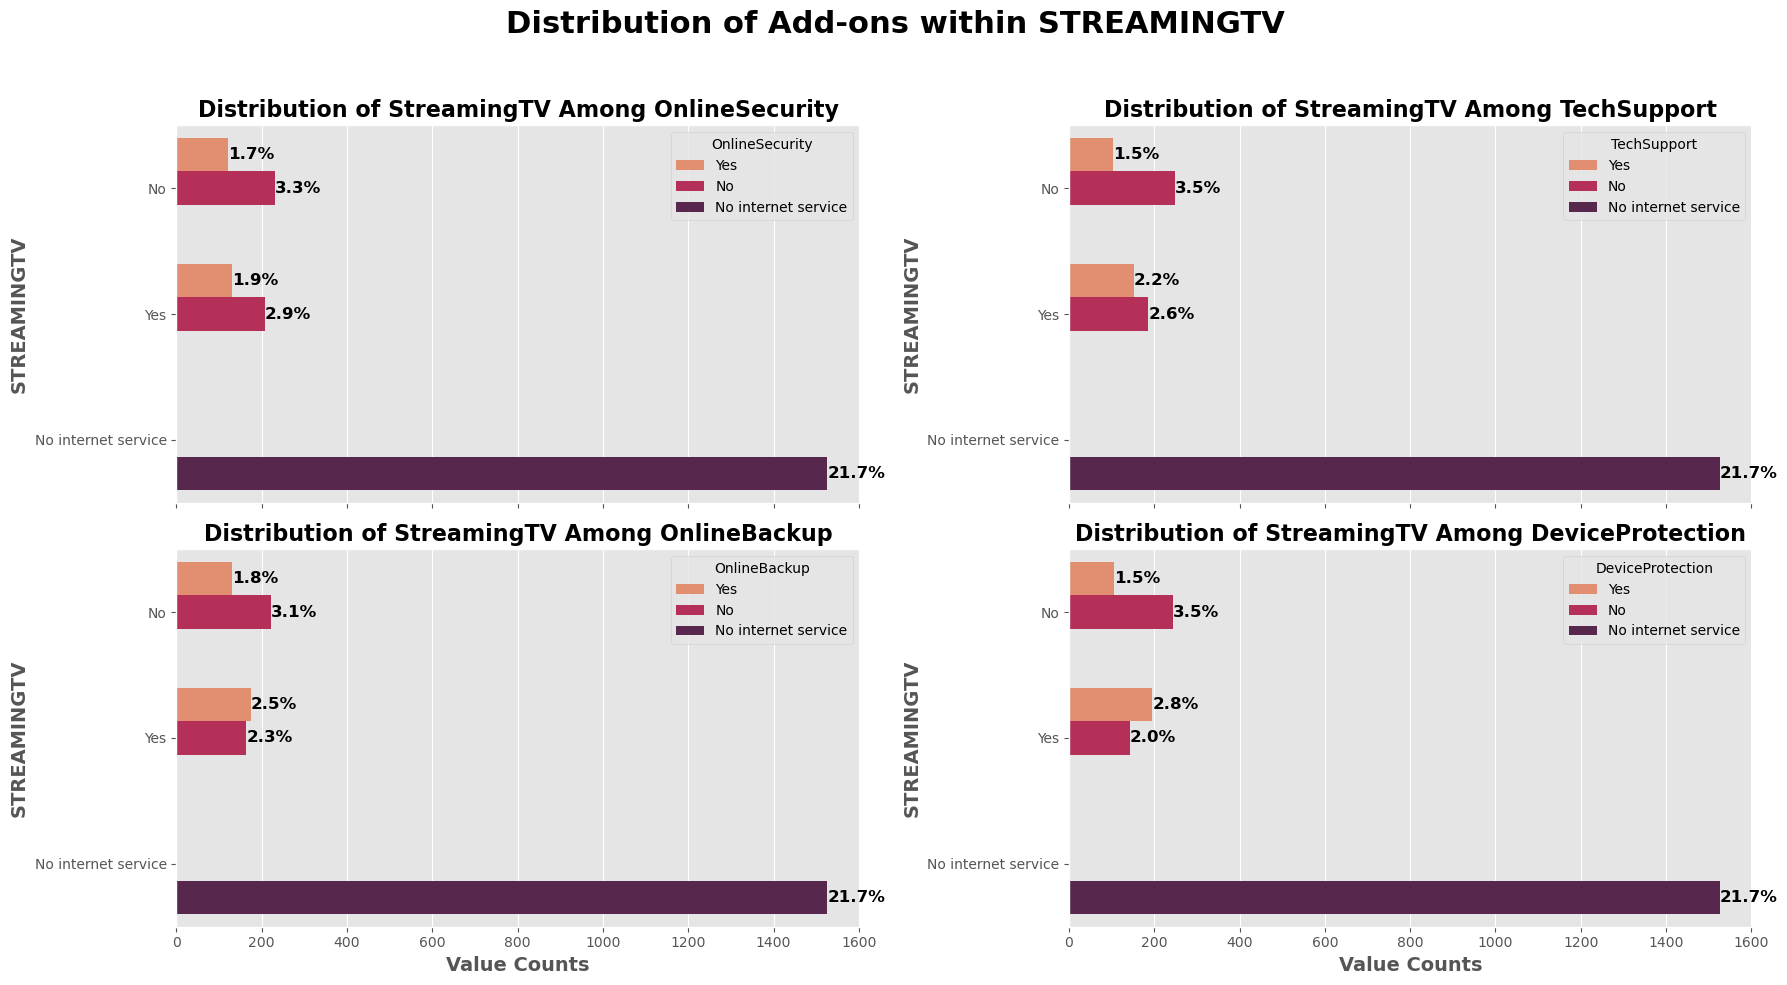


---------------
FEATURE: STREAMINGMOVIES
---------------


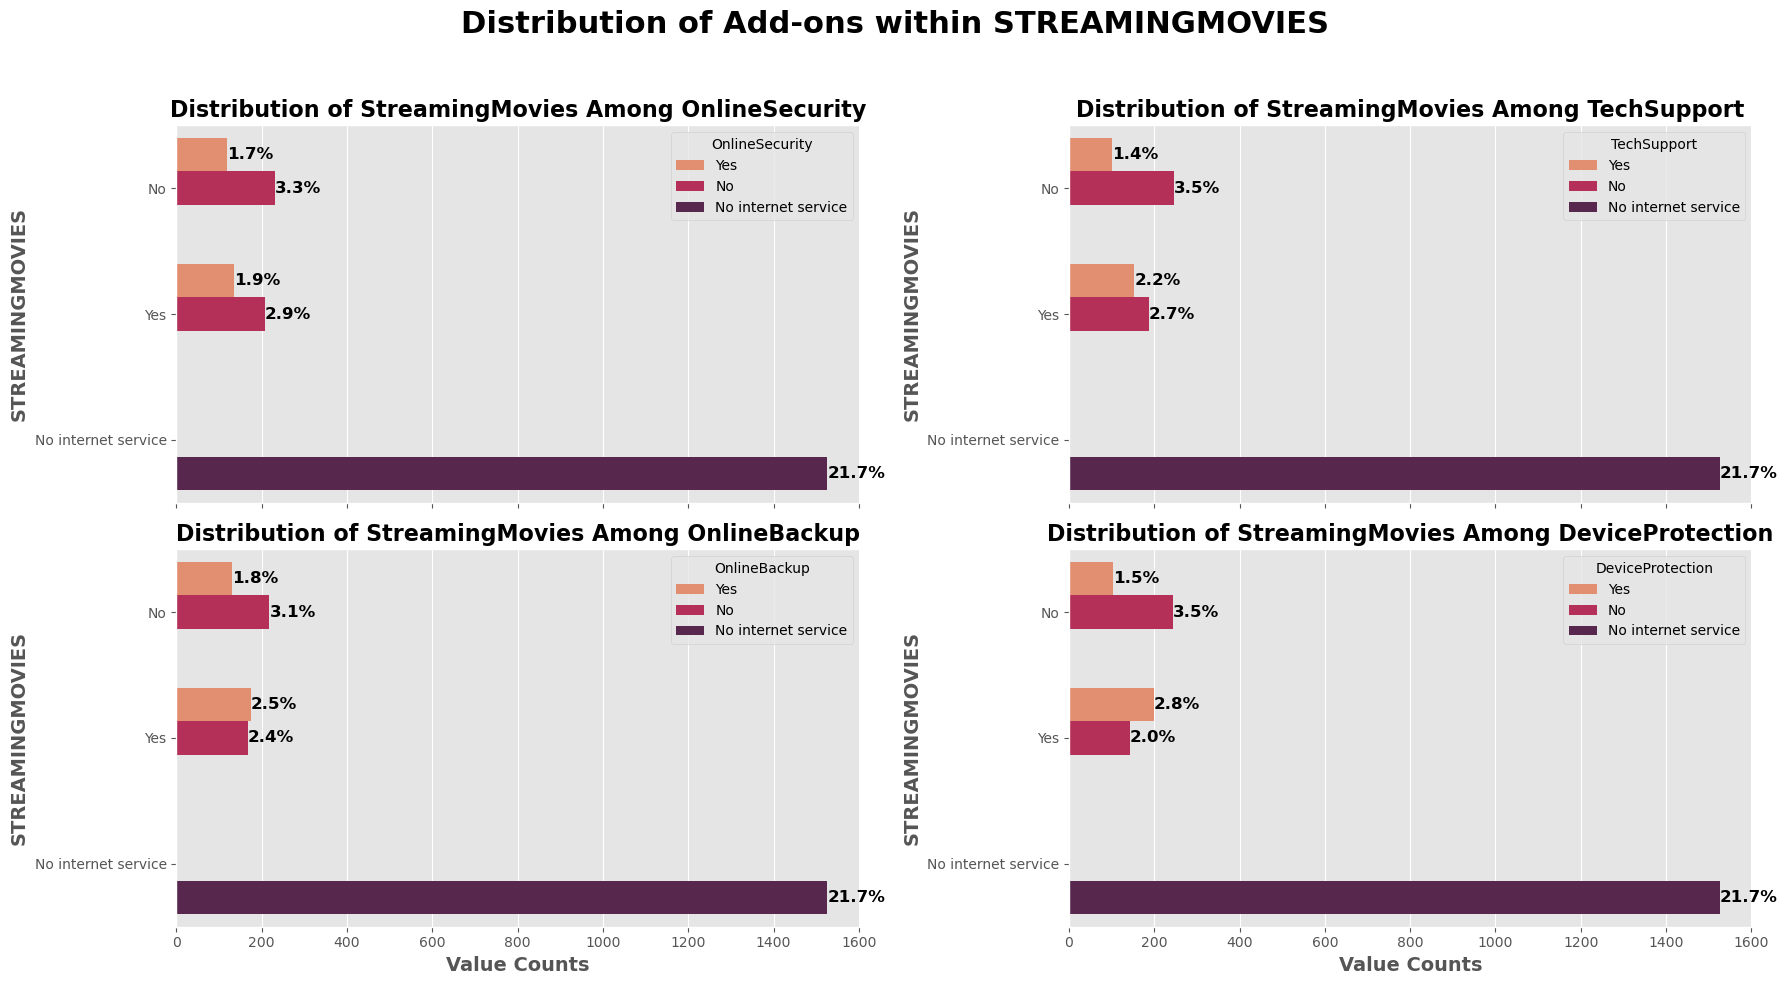


---------------
FEATURE: CONTRACT
---------------


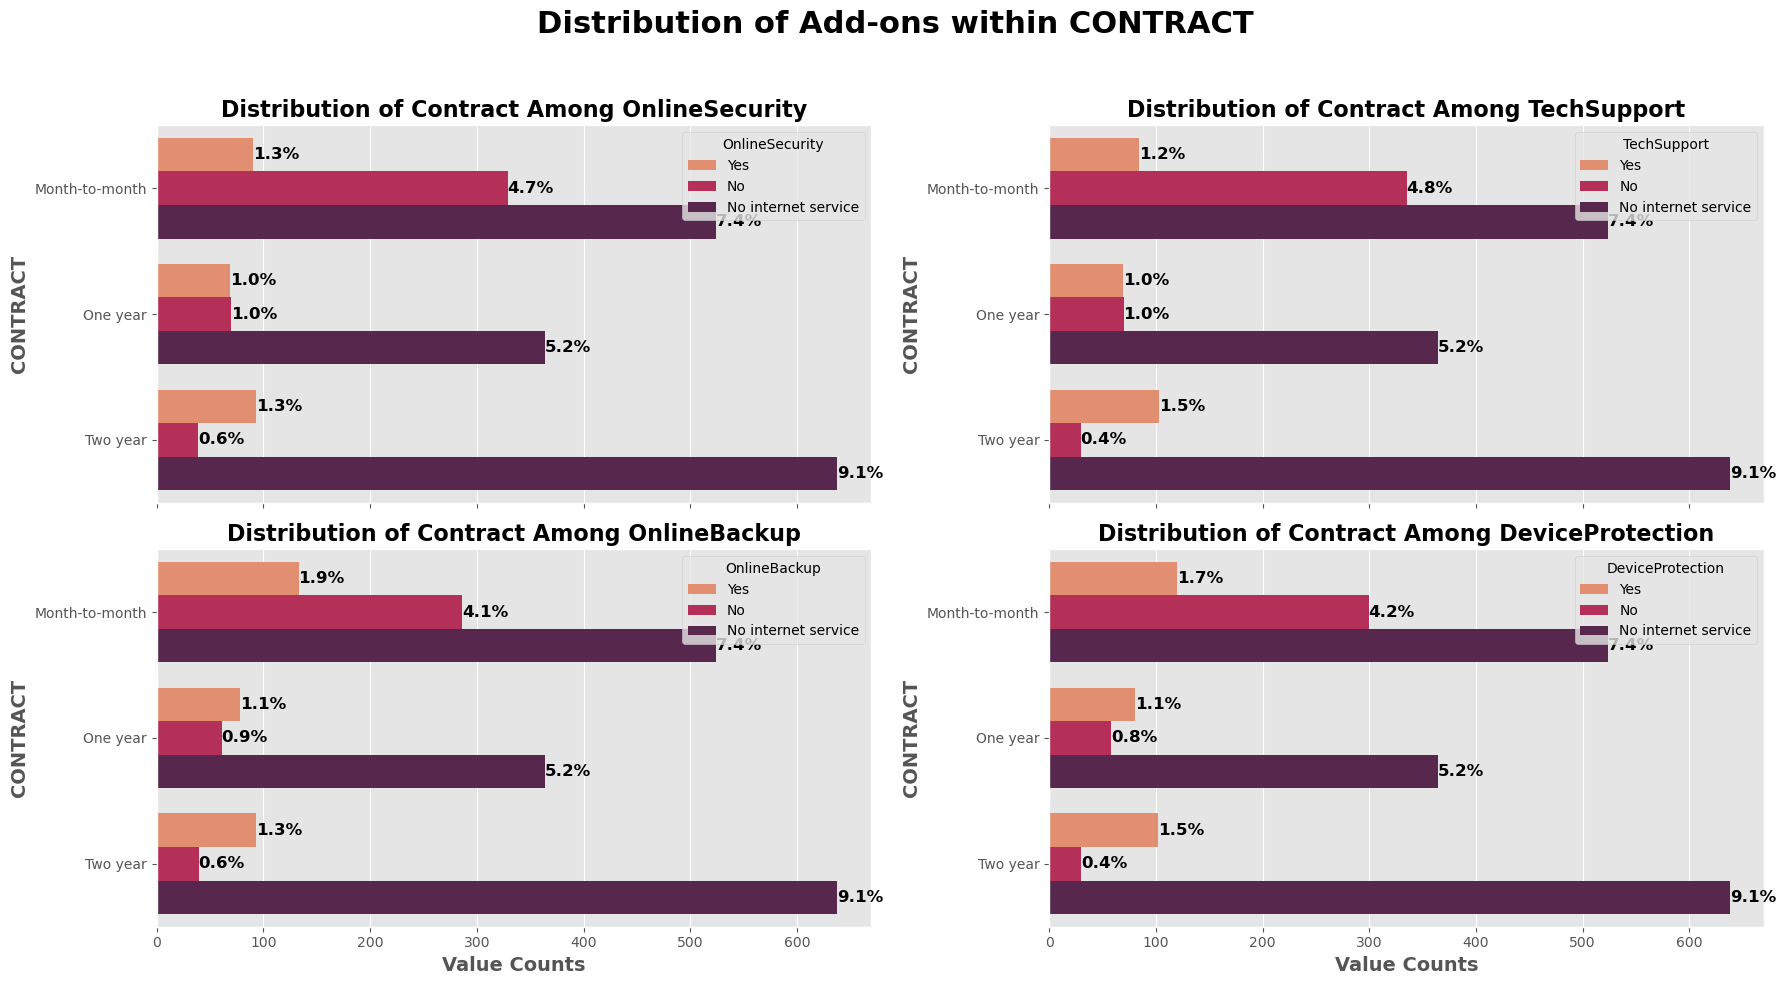

In [10]:
for column in df_nominal.columns:
    if column in add_ons + ['Churn']:
        continue
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    grouped = df_nominal.groupby(add_ons + [column]).size().rename('count').reset_index()
    fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True)
    axes = axes.flatten()
    for index, add_on in enumerate(add_ons):
        ax = axes[index]
        sns.barplot(ax=ax, data=grouped, x='count', y=column, hue=add_on,
                    hue_order=['Yes','No','No internet service'], palette='rocket_r', errorbar=None)
        plt.suptitle(f'Distribution of Add-ons within {column.upper()}', fontsize=22, fontweight='bold')
        plt.subplots_adjust(top=0.9)
        ax.set_title(f'Distribution of {column} Among {add_on}', fontsize=16, fontweight='semibold')
        ax.set_xlabel('Value Counts', fontsize=14, fontweight='semibold')
        ax.set_ylabel(column.upper(), fontsize=14, fontweight='semibold')
        ax.legend(title=add_on, bbox_to_anchor=(1, 1), loc='upper right')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot        
        for p in ax.patches:
            if p.get_width() > 0:
                percentage = p.get_width() / df_nominal[column].value_counts().sum() * 100
                ax.annotate(f'{percentage:.1f}%',
                            (p.get_width(), p.get_y() + p.get_height() / 2.),
                            ha='left', va='center',
                            xytext=(0, 0),  # Adjust spacing
                            textcoords='offset points', fontweight='semibold', fontsize=12, color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### Groupby `Add-ons` and `Churn`

- A lot of of our customers don't have `InternetService`, and likewise they also are not enrolled into our `Add-on` services.
- Now to investigate how churn is distributed to those who `have Internet` and how `Add-Ons` play a role in `Churn`.


---------------
FEATURE: GENDER
---------------


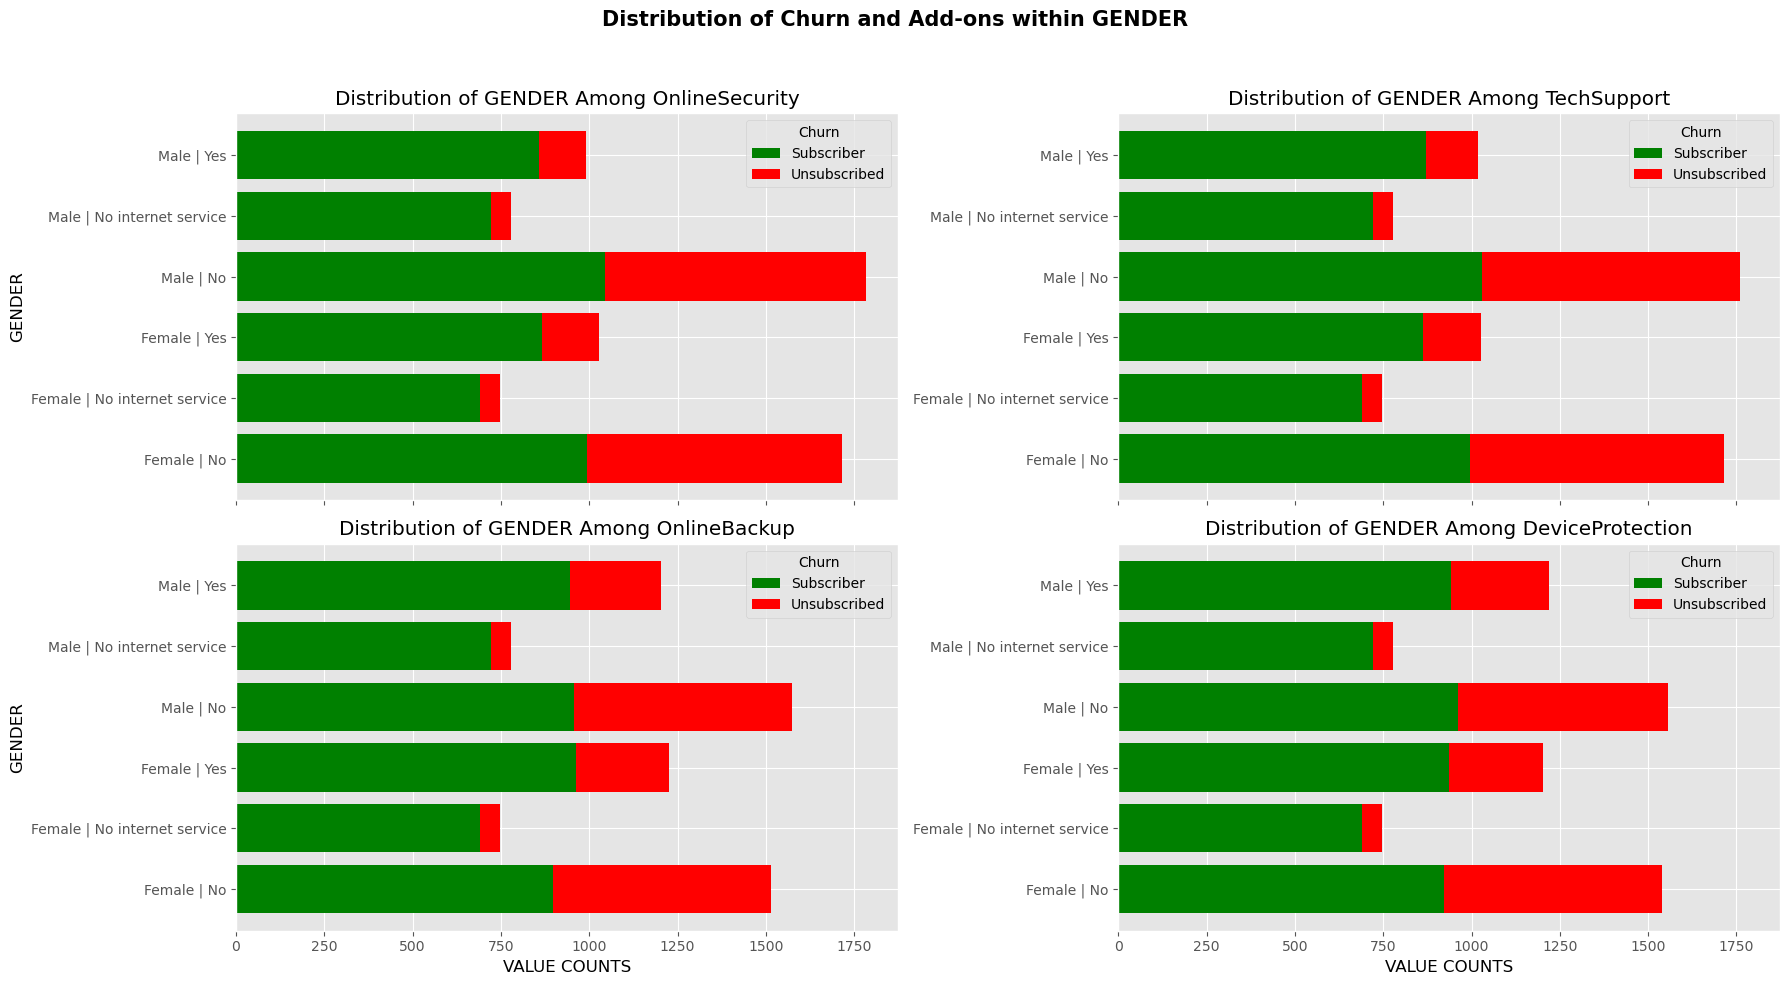


---------------
FEATURE: SENIORCITIZEN
---------------


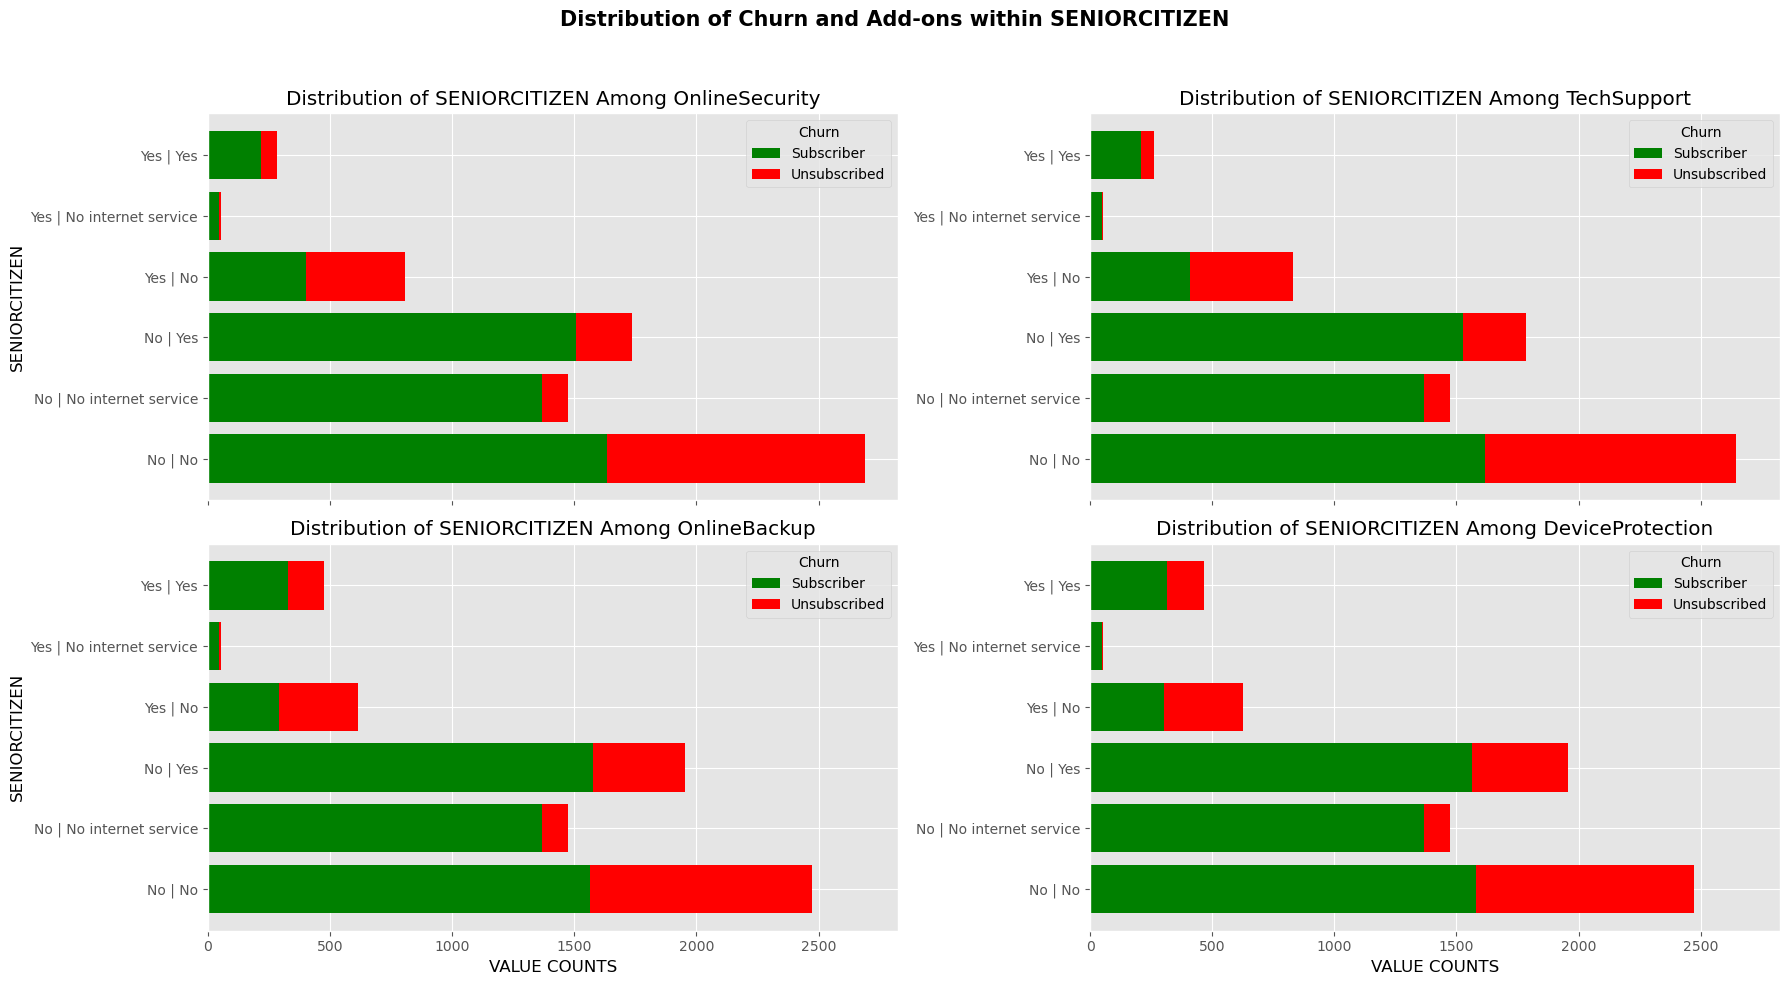


---------------
FEATURE: PARTNER
---------------


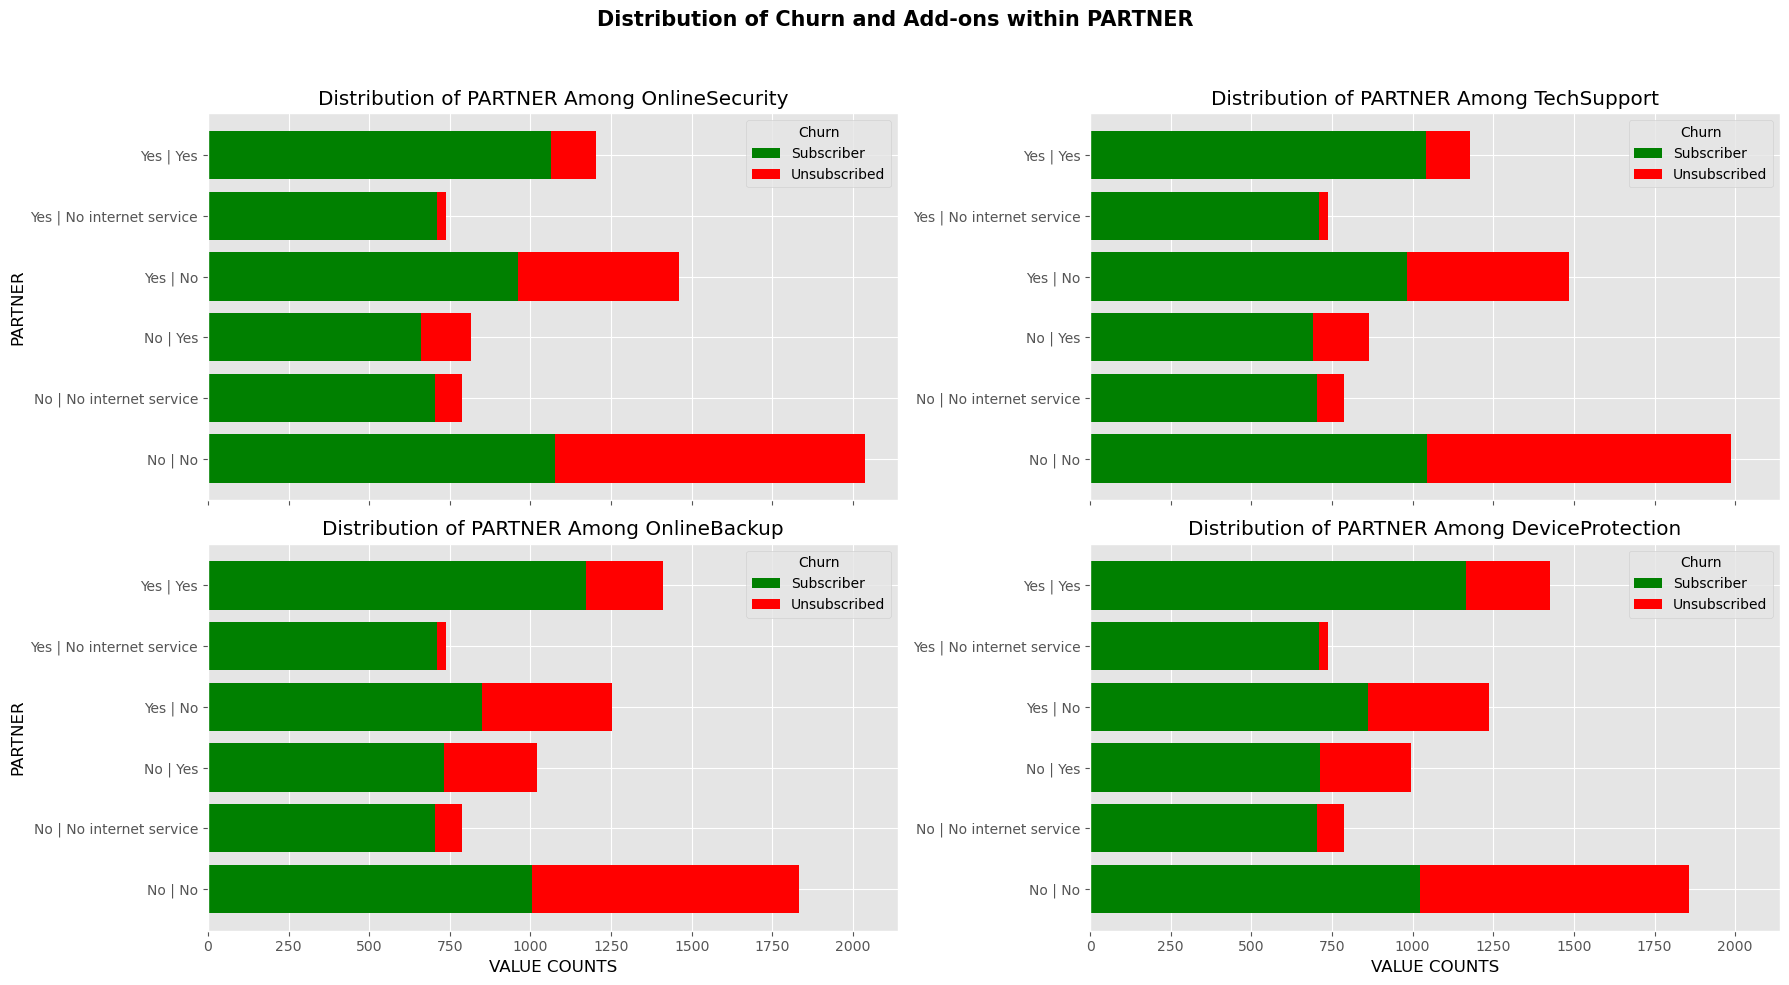


---------------
FEATURE: DEPENDENTS
---------------


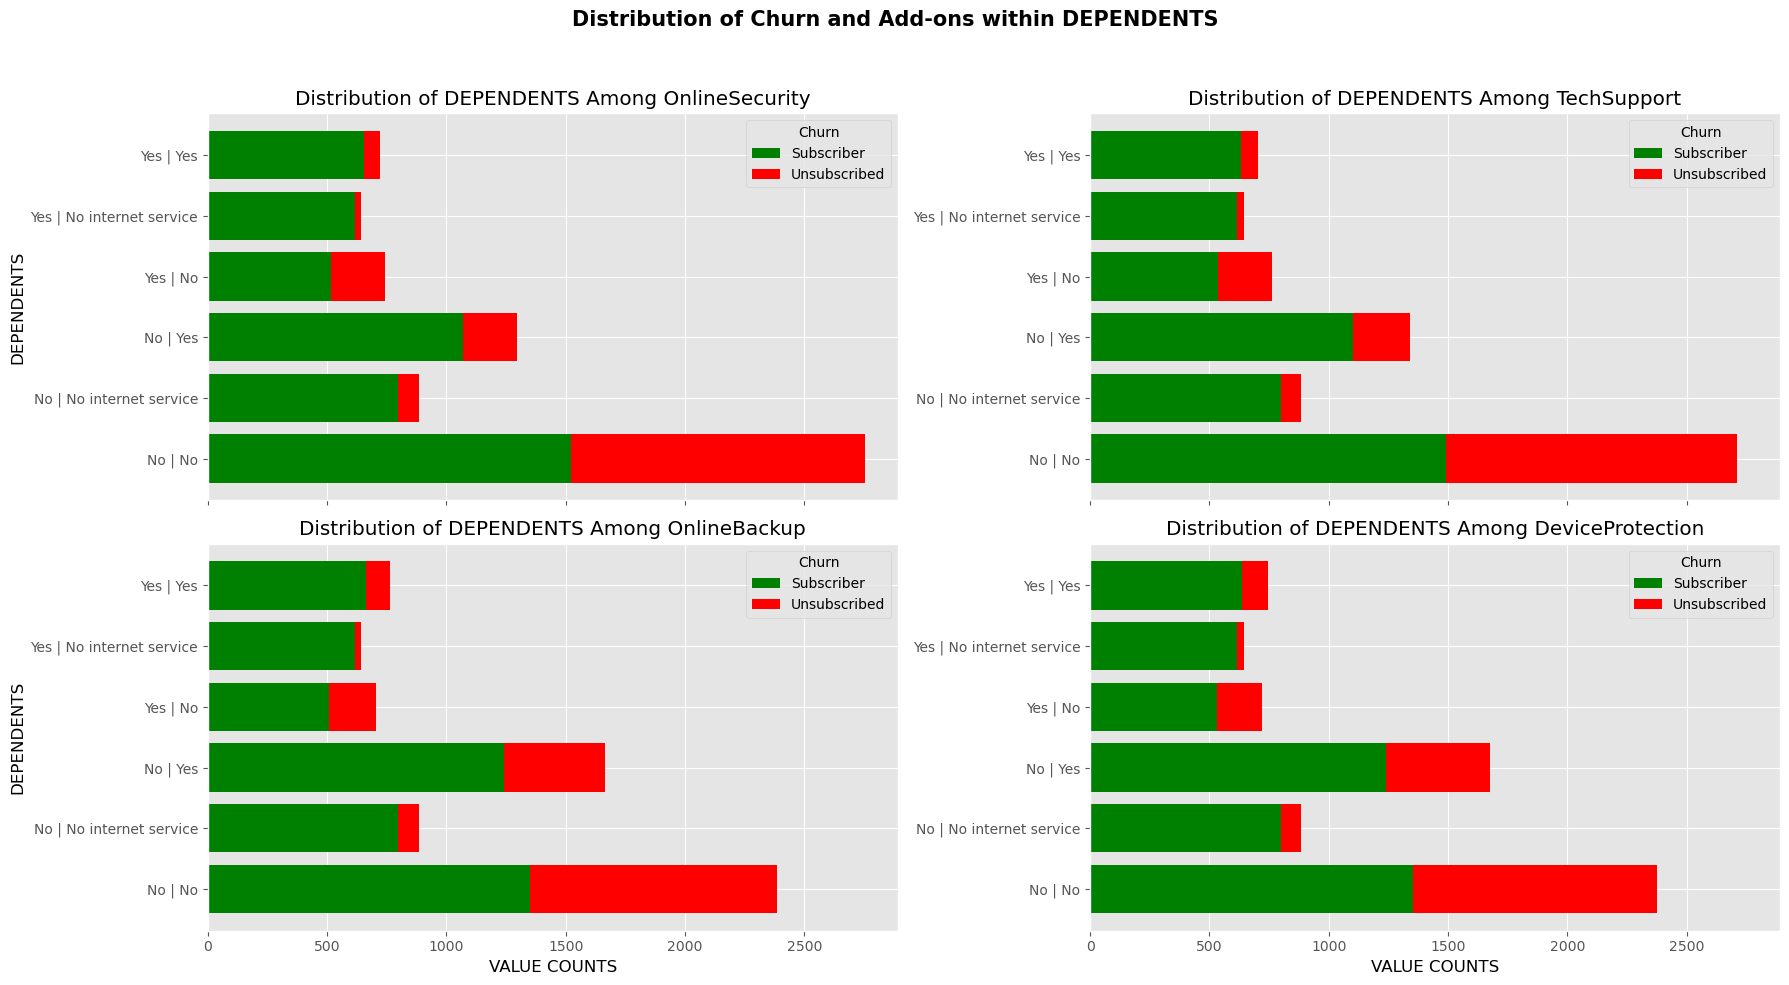


---------------
FEATURE: PHONESERVICE
---------------


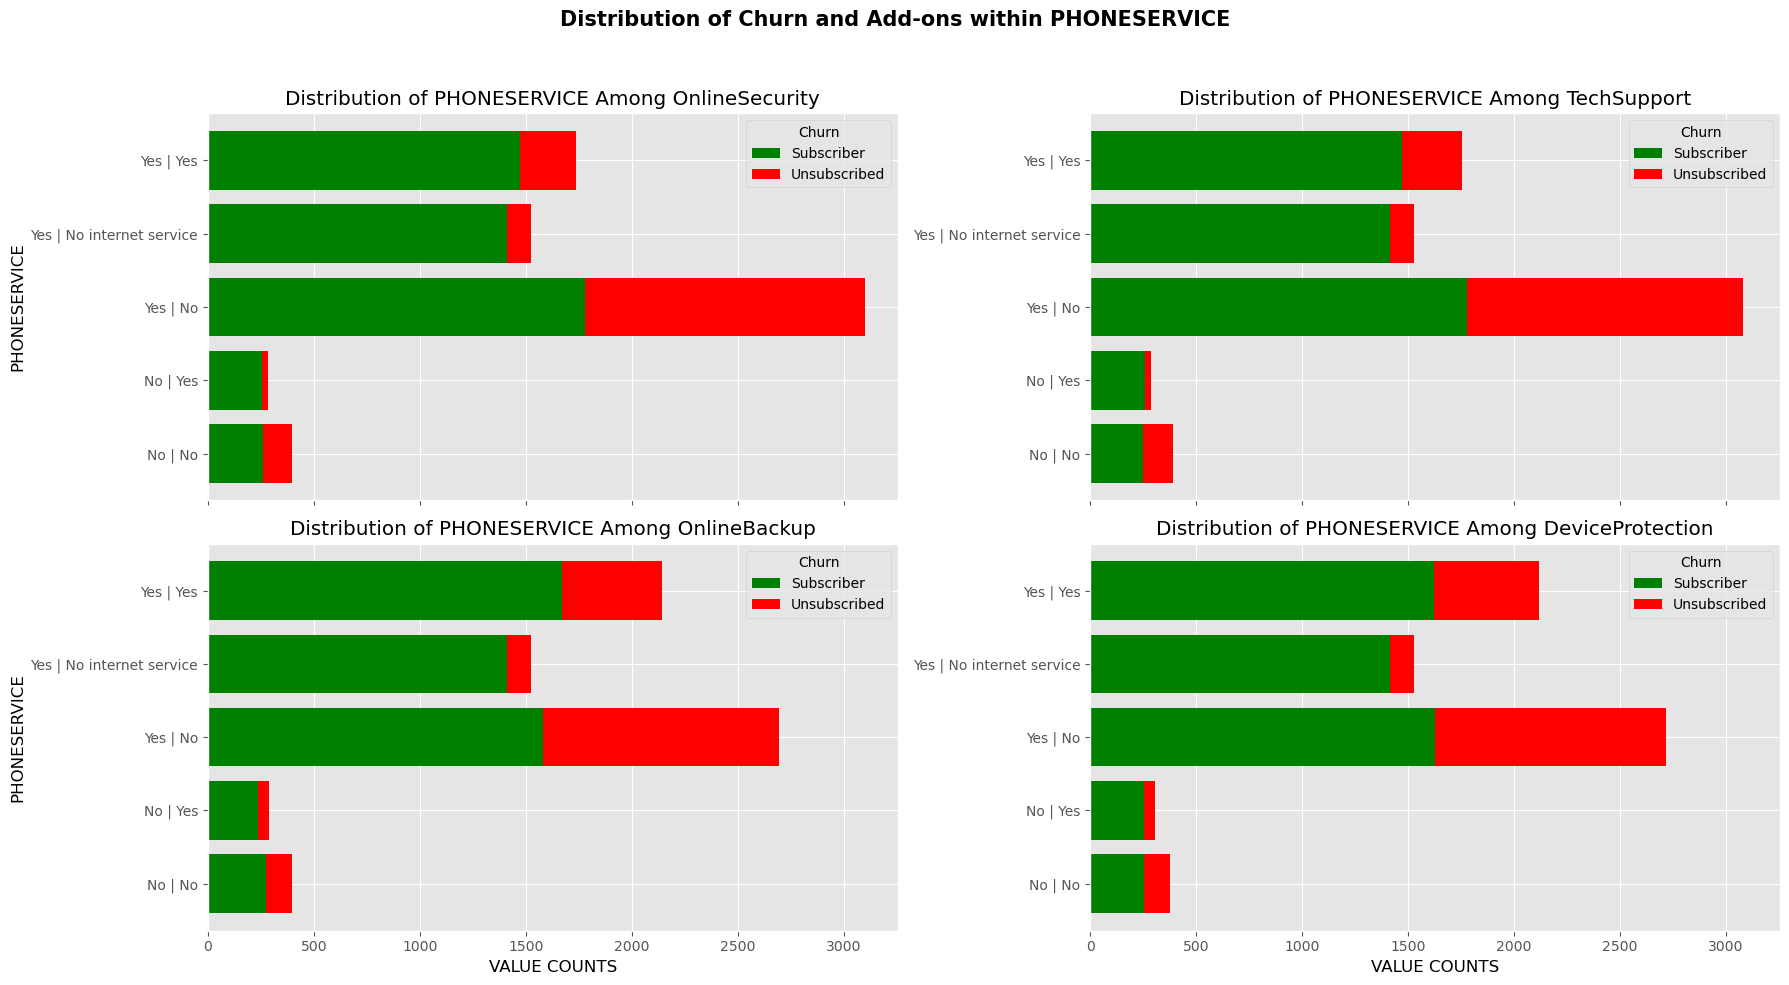


---------------
FEATURE: MULTIPLELINES
---------------


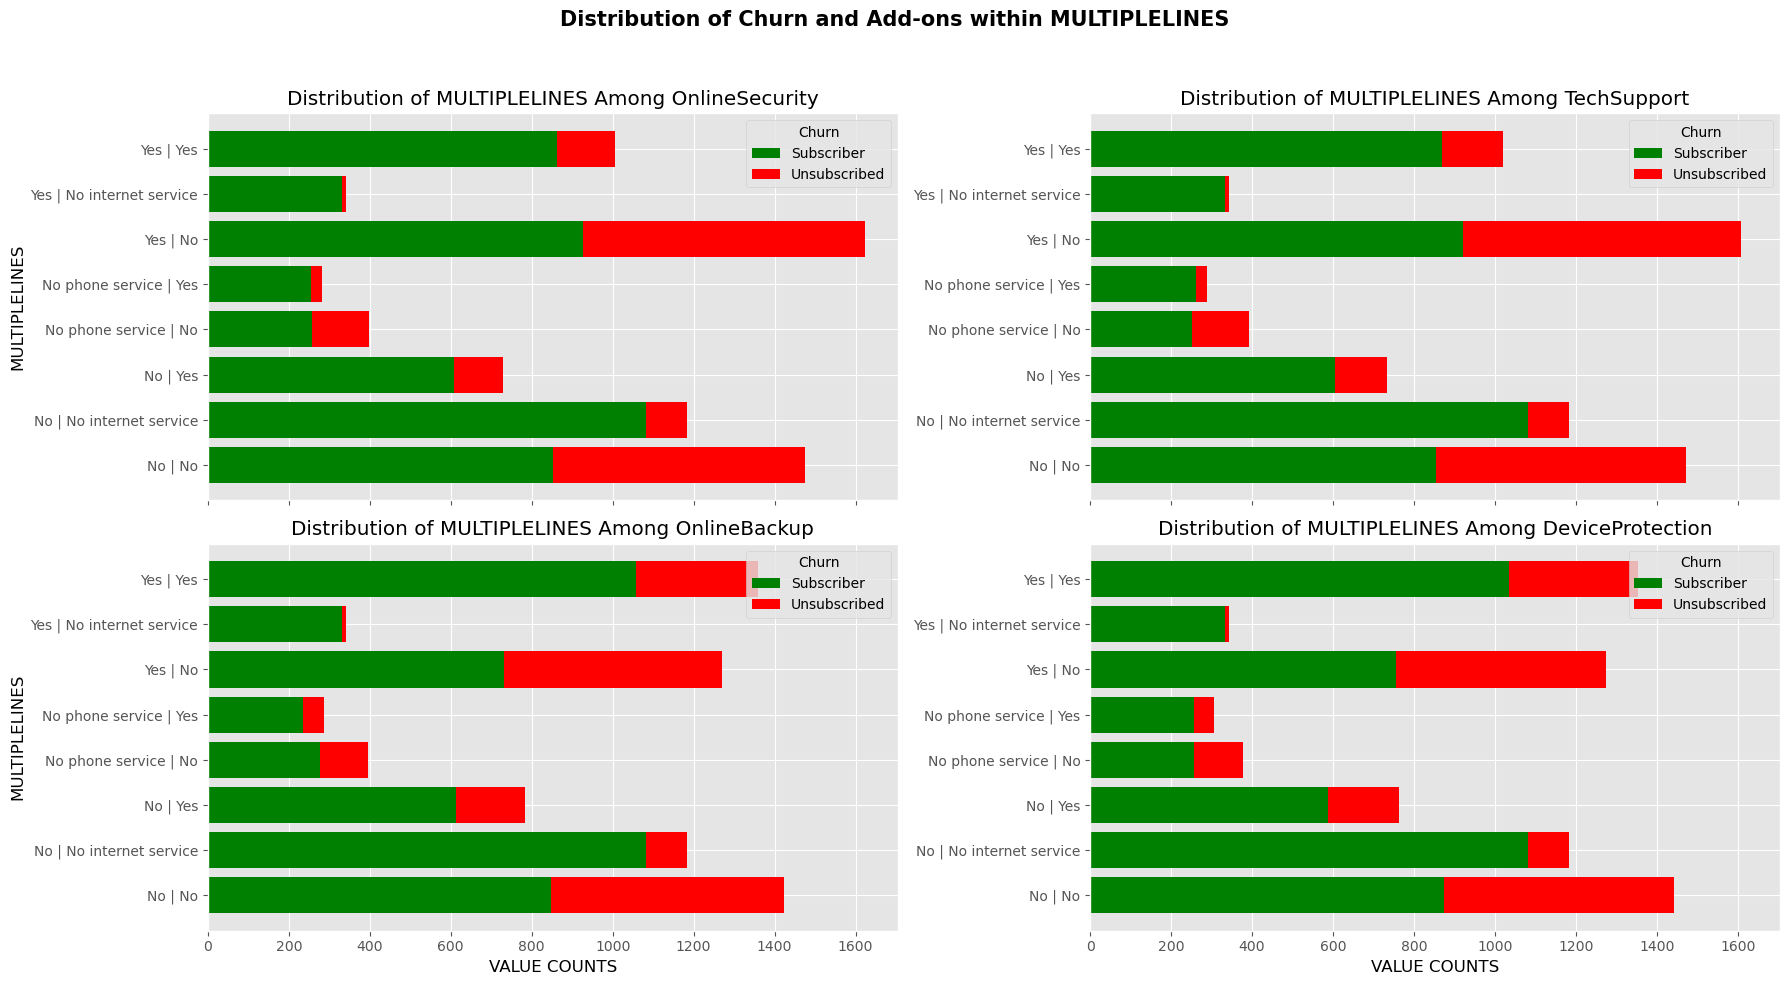


---------------
FEATURE: INTERNETSERVICE
---------------


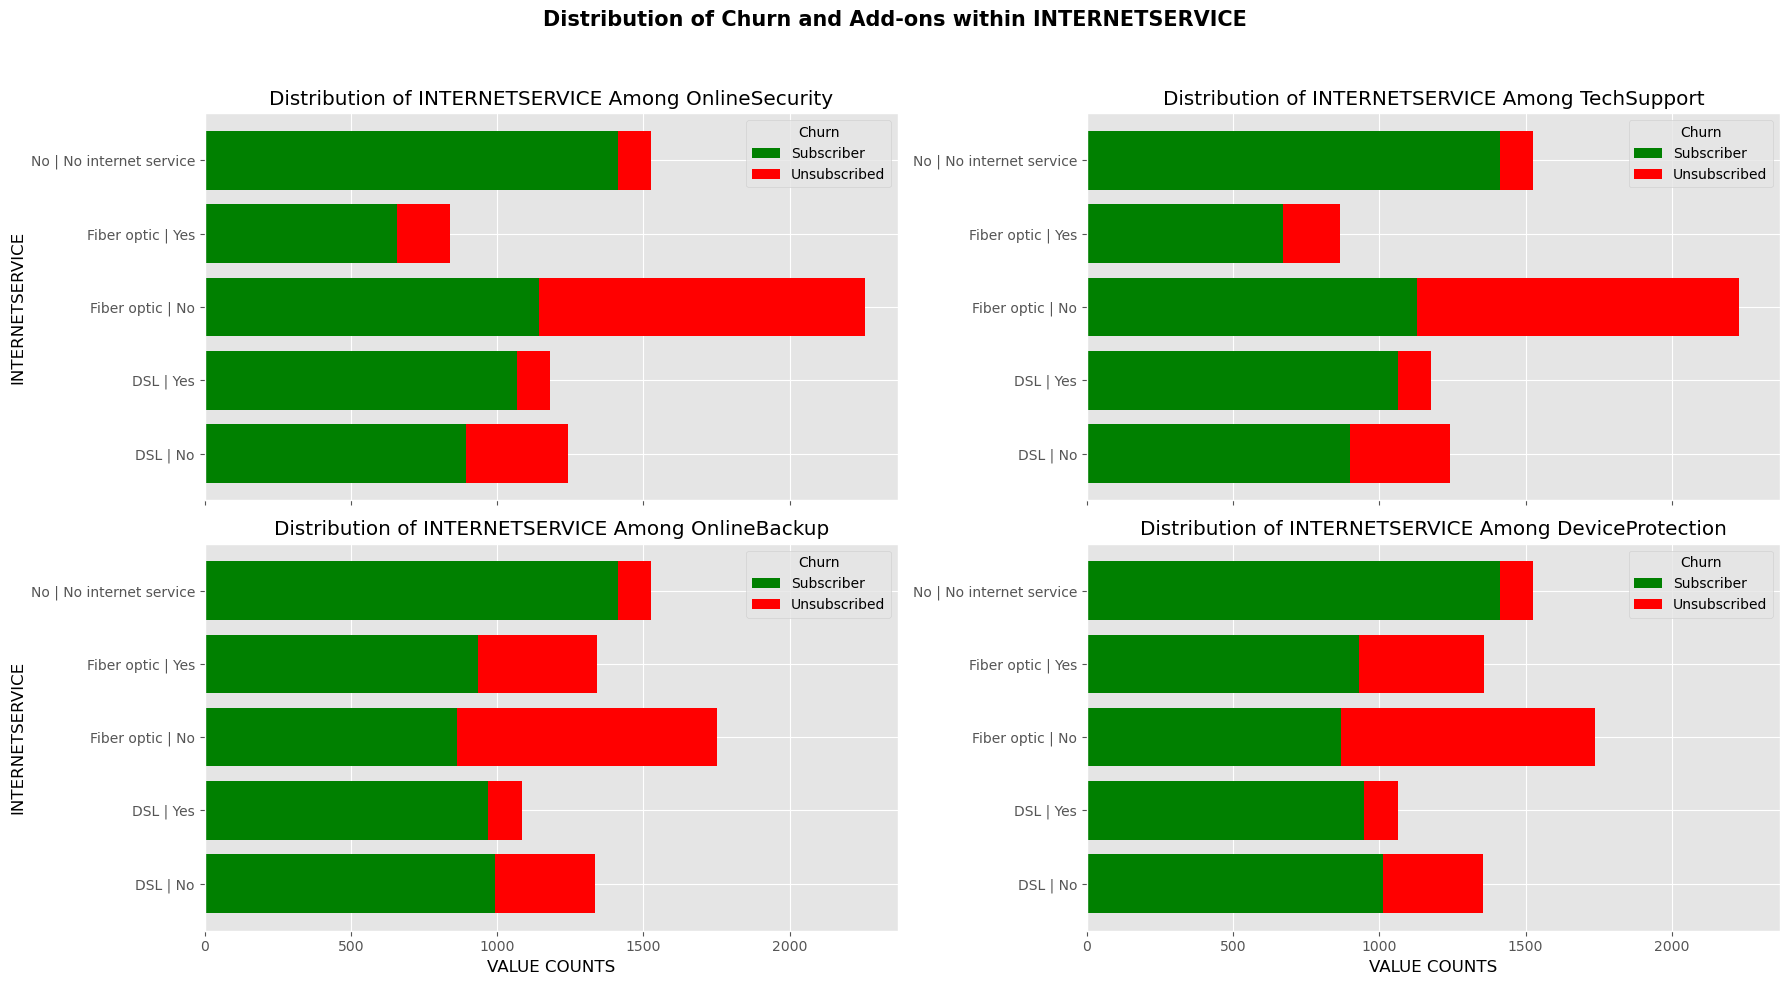


---------------
FEATURE: STREAMINGTV
---------------


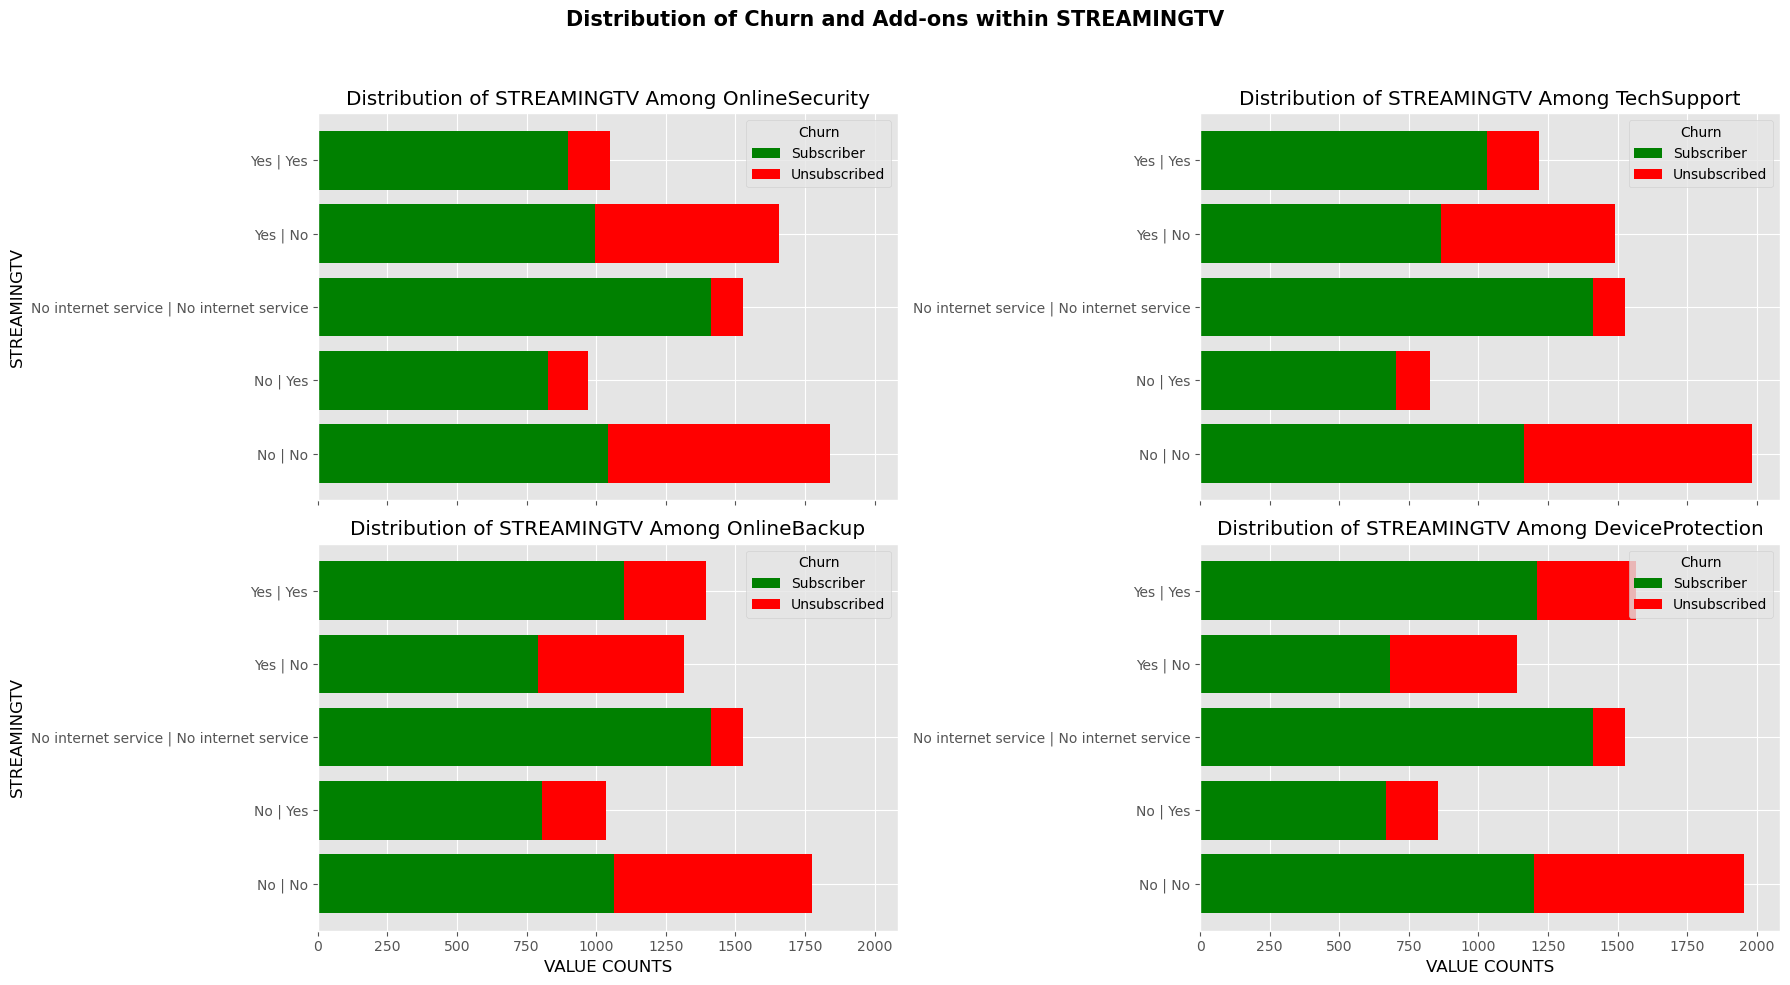


---------------
FEATURE: STREAMINGMOVIES
---------------


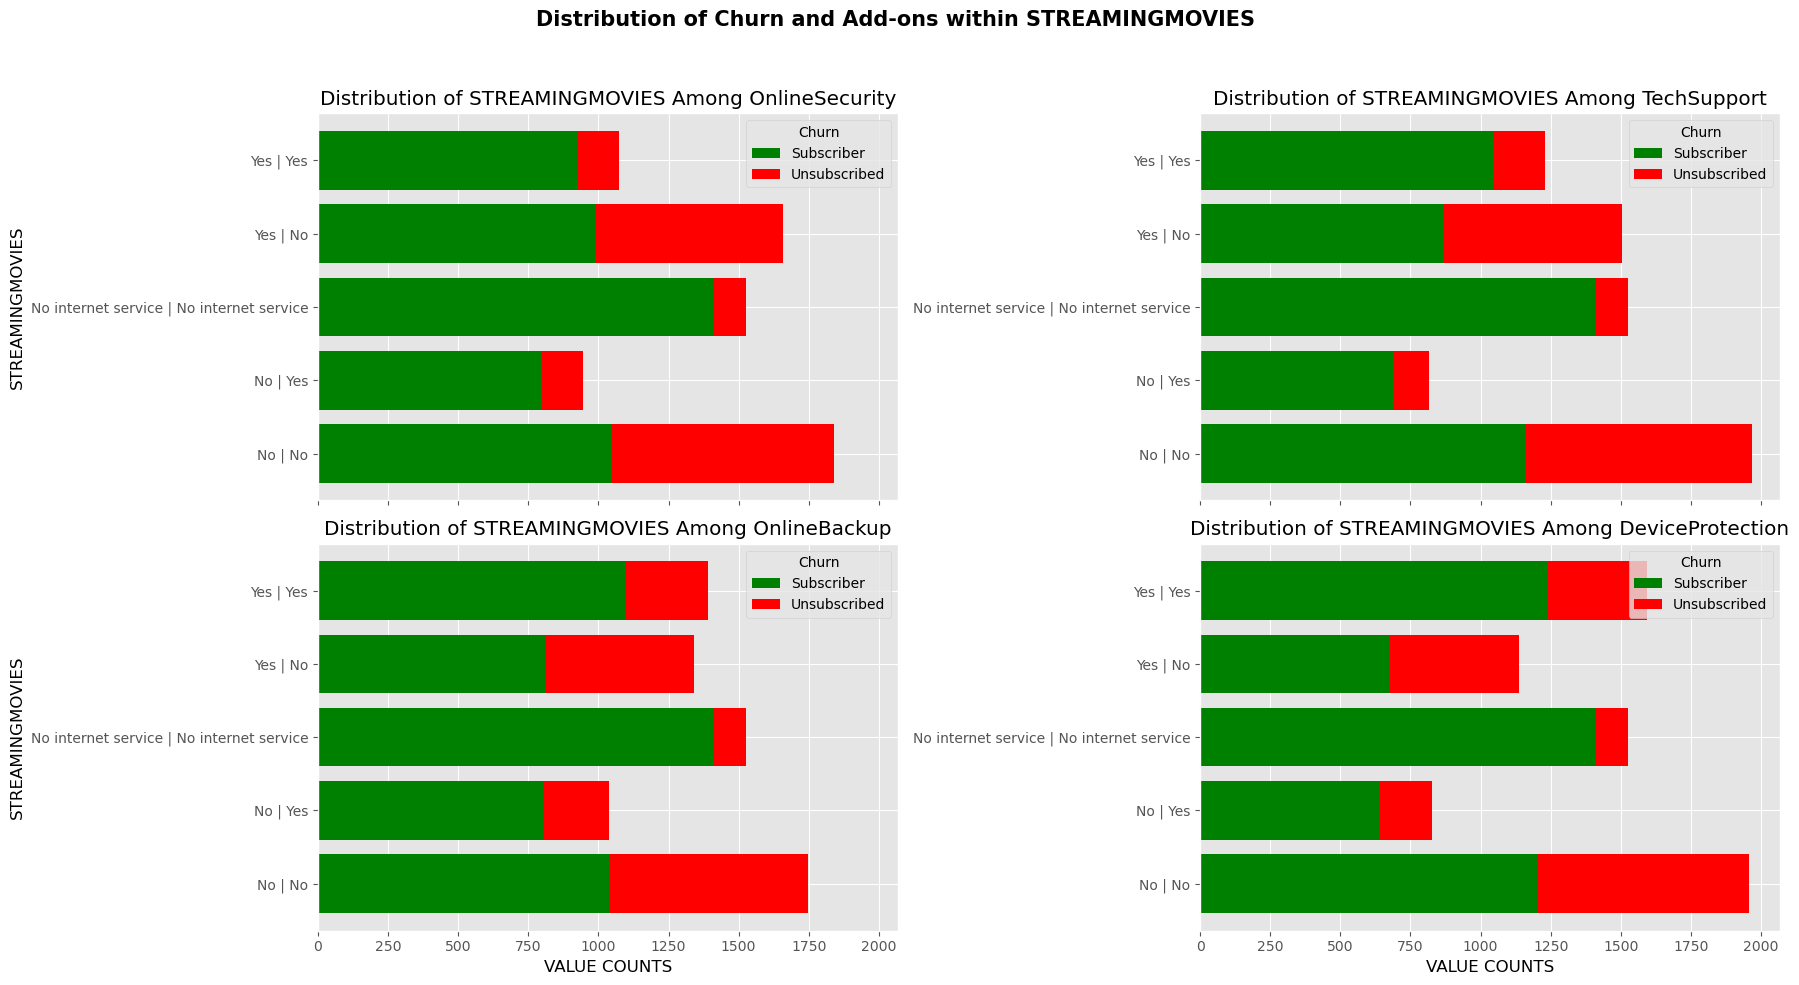


---------------
FEATURE: CONTRACT
---------------


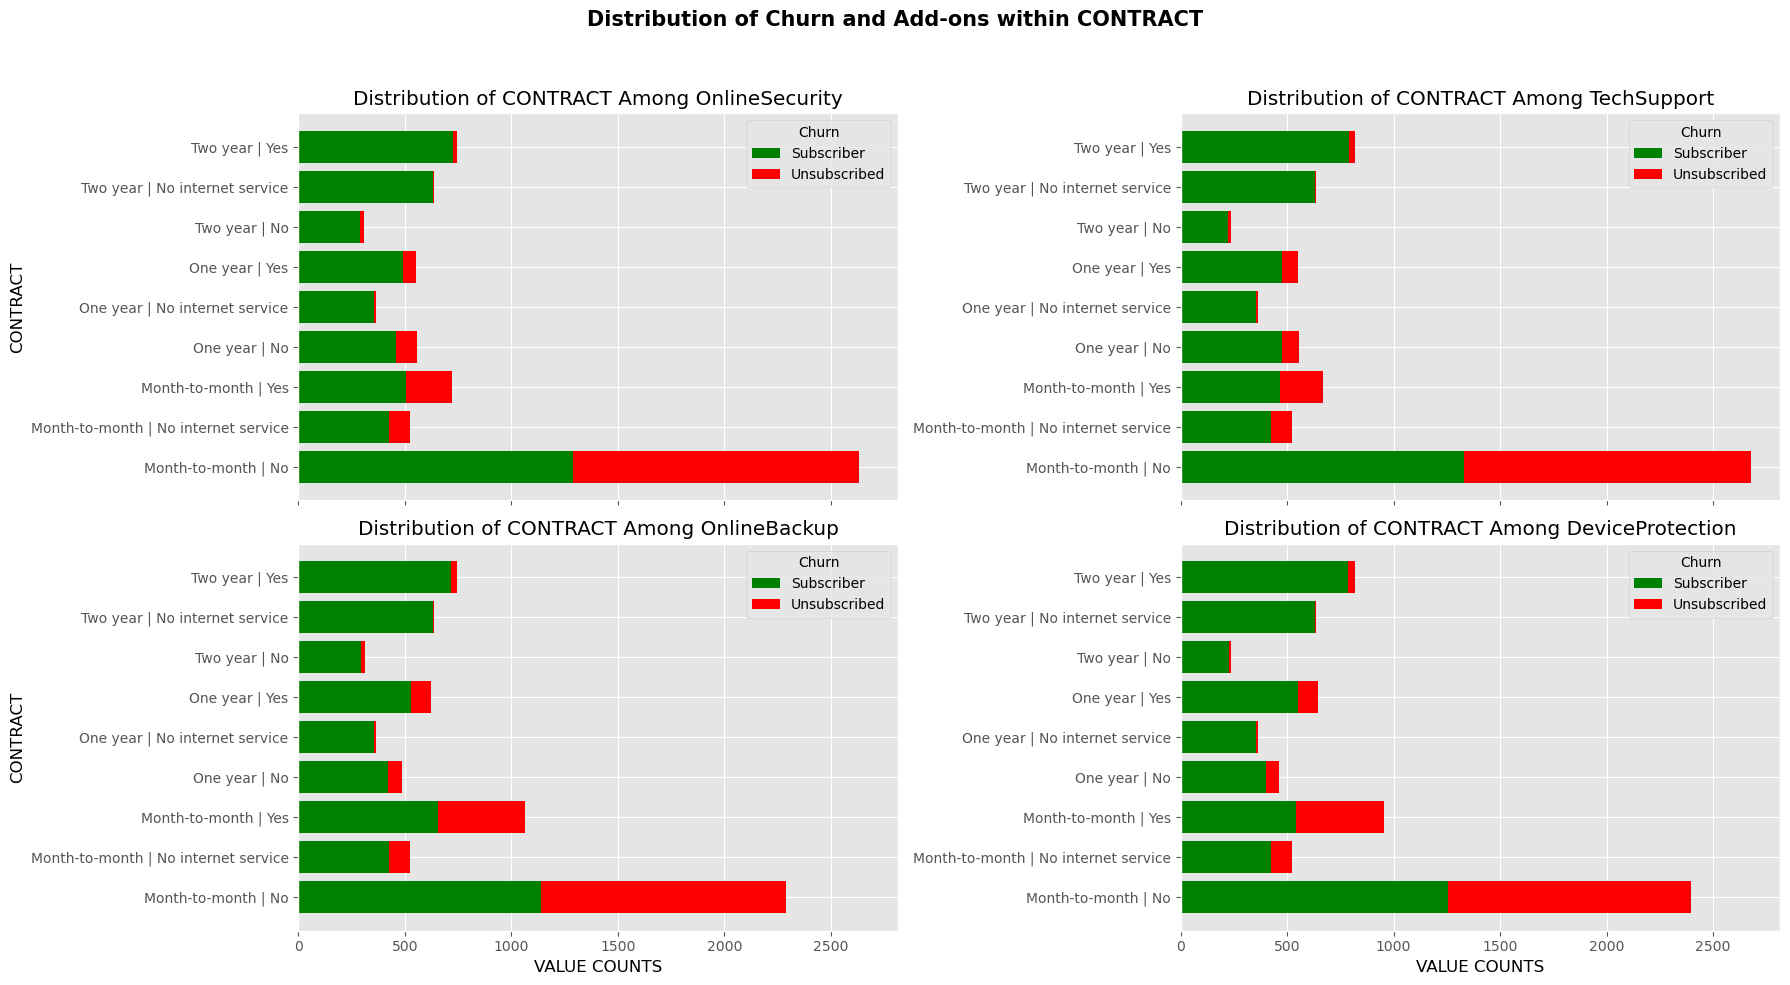

In [11]:
for column in df_nominal.columns:
    if column in add_ons + ['Churn']:
        continue
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True)
    axes = axes.flatten()
    for index, add_on in enumerate(add_ons):
        ax = axes[index]
        grouped = df_nominal.groupby([column, add_on, 'Churn']).size().reset_index(name='count')
    # for churn_status and df_pivot code created by ChatGPT, help with grouping multiple features on 1 x-axis
        pivot_df = grouped.pivot_table(index=[column, add_on], columns='Churn', values='count', fill_value=0)
        pivot_df = pivot_df.reset_index()
        colors = {'Subscriber': 'green', 'Unsubscribed': 'red'}
        for churn_status in pivot_df.columns[2:]:
            ax.barh(
                pivot_df.index,
                pivot_df[churn_status],
                left=pivot_df[pivot_df.columns[2:]].cumsum(axis=1)[churn_status] - pivot_df[churn_status],
                label=churn_status,
                color=colors[churn_status]
            )

        ax.set_yticks(pivot_df.index)
        ax.set_yticklabels([f'{row[0]} | {row[1]}' for row in pivot_df[[column, add_on]].values])
        ax.set_title(f'Distribution of {column.upper()} Among {add_on}', color='black')
        if index == 2 or index == 3:
            ax.set_xlabel('Value Counts'.upper(), color='black')
        if index == 0 or index == 2:
            ax.set_ylabel(f'{column.upper()}', color='black')
        ax.legend(title='Churn', bbox_to_anchor=(1, 1), loc='upper right')
    plt.suptitle(f'Distribution of Churn and Add-ons within {column.upper()}', fontsize=15, fontweight='bold', color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Observations

These are `highlights` of our data that need to be further investigated by `statistical testing`.

- ### Customers subscribed to `InternetService` have high churn and the service `Fiber-optic` churns faster than `DSL`.
- ### Customers with `Fiber Optic` internet and add-ons like `OnlineSecurity` and `TechSupport` have lower churn rates compared to those without these add-ons.
- ### Customers whose `Month-to-month` subscription that exceeds `$70` have high `churn` within the 1st year.

# Hypothesis
#### `If we bundle Fiber Optic internet service with various Add-on solutions to customers whose monthly bill exceeds $70, then their likelihood of churning will decrease.`

# Statistical Analysis
- We will be conducting the statistical `chi-square test` for `InternetService` and the various `Add-ons` because we are working with `categorical` variables and this test will help us understand if the two variables are statsitically significant.
- We will also conduct a `T-test` for comparing `numerical` `MonthlyCharges` below and over `$70` because we are comparing the mean churn rate for two different groups.

## Customers subscribed to `InternetService` have high churn and the service `Fiber-optic` churns faster than `DSL`.


### Chi2 Test

In [88]:
internet_serv = df[df['InternetService'] != 'No']
contingency_table = pd.crosstab(internet_serv['InternetService'],internet_serv['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
p

2.2962170975696968e-73

### Business Implications
We reject the null hypothesis. We have an extremely small `p-value`, meaning `InternetService` and `Churn` are statistically `signicicant`.
- Since churn is higher for Fiber-optic customers, this means there are issues to the Fiber-optic service specifically, that are driving customers away.
- We will need to investigate the quality and reliability of our Internet Service. Are there technical issues or problems serving customers?
- We need to offer incentives to customers so we can retain them in the interim while we resolve our internet service issues.

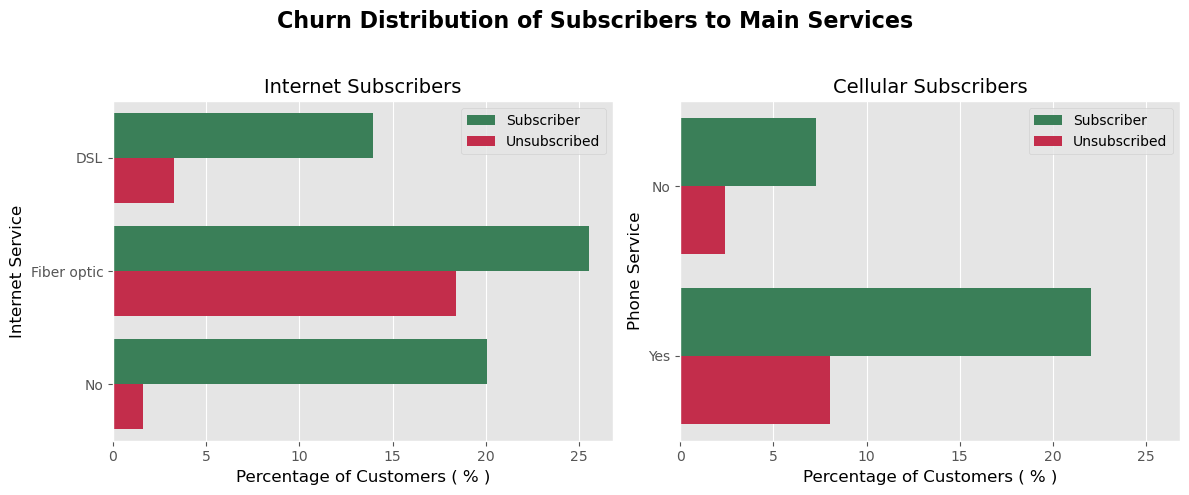

In [91]:
grouped = df_nominal.groupby(['Churn', 'InternetService', 'PhoneService']).size().rename('count').reset_index()
grouped['percentage'] = (grouped['count']/grouped['count'].sum()) * 100

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 5), sharex=True)
sns.barplot(ax=ax1, data=grouped, x='percentage', y='InternetService', hue='Churn',
            palette={'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}, errorbar=None)
ax1.set_title('Internet Subscribers', color='black', fontsize=14)
ax1.set_xlabel('Percentage of Customers ( % )', color='black')
ax1.set_ylabel('Internet Service', color='black')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper right')

sns.barplot(ax=ax2, data=grouped, x='percentage', y='PhoneService', hue='Churn',
            palette={'Subscriber':'seagreen','Unsubscribed':'crimson'}, errorbar=None)
ax2.set_title('Cellular Subscribers', color='black', fontsize=14)
ax2.set_xlabel('Percentage of Customers ( % )', color='black')
ax2.set_ylabel('Phone Service', color='black')
ax2.legend(bbox_to_anchor=(1,1), loc='upper right')

plt.suptitle('Churn Distribution of Subscribers to Main Services', fontsize=16, fontweight='bold', color='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_1.png')
plt.show()

## Customers with `Fiber Optic` internet and add-ons like `OnlineSecurity` and `TechSupport` have lower churn rates compared to those without these add-ons.

In [92]:
fiber_optic = df[df['InternetService'] =='Fiber optic']
for column in add_ons:
    contingency_table = pd.crosstab(fiber_optic[column],fiber_optic['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f'{column} \n  - p-Value = {p}')

OnlineSecurity 
  - p-Value = 4.046883047145898e-43
TechSupport 
  - p-Value = 1.6726808743988167e-41
OnlineBackup 
  - p-Value = 4.1194070284719136e-30
DeviceProtection 
  - p-Value = 8.96730440877596e-25


### Business Implications
We reject the null hypothesis. We have an extremely small `p-value`, meaning `InternetService` and `Churn` are statistically `signicicant`.
- Since churn is higher for Fiber-optic customers, this means there are issues to the Fiber-optic service specifically, that are driving customers away.
- We will need to investigate the quality and reliability of our Internet Service. Are there technical issues or problems serving customers?
- We need to offer incentives to customers so we can retain them in the interim while we resolve our internet service issues.

We reject the null hypothesis. We have an extremely small `p-value` across all the add-ons, meaning all of our `Add-ons` and `Churn` are statistically `signicicant`.

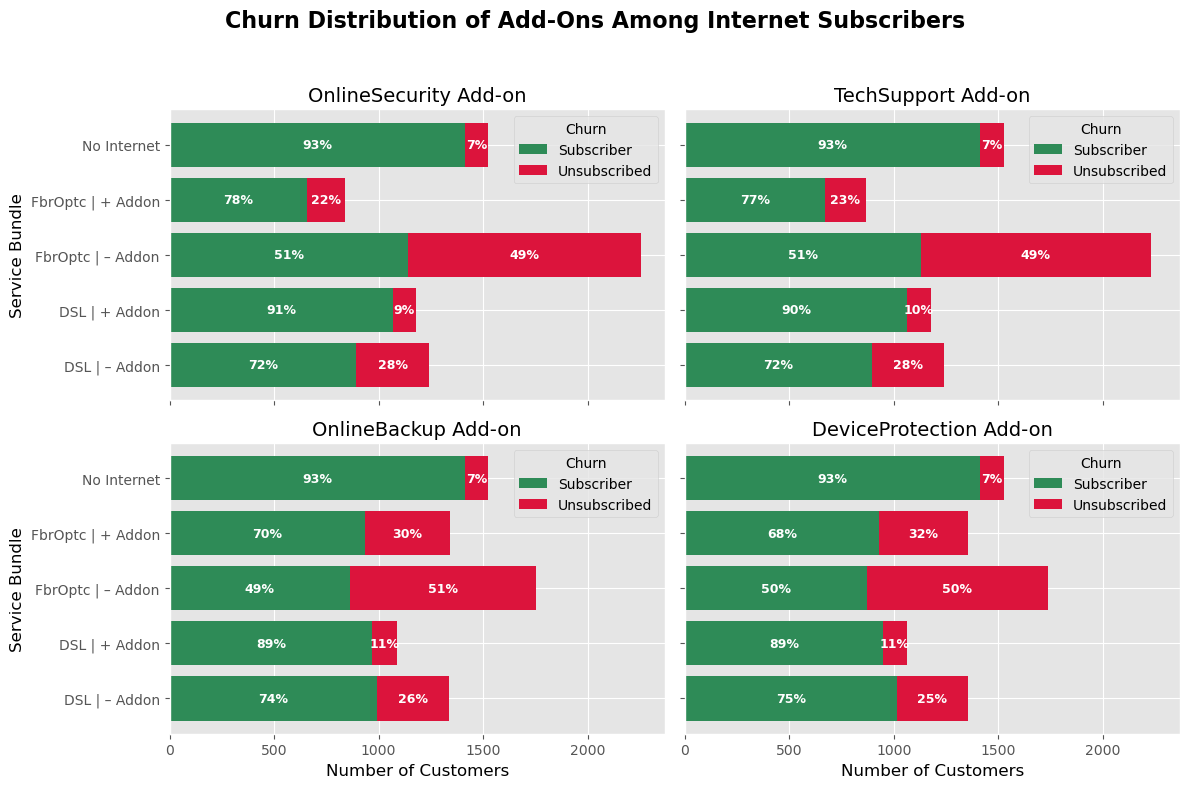

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

column = 'InternetService'
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for index, add_on in enumerate(['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']):
    ax = axes[index]
    grouped = df_nominal.groupby([column, add_on, 'Churn']).size().reset_index(name='count')
    total_counts = grouped.groupby([column, add_on])['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / total_counts) * 100
    # for churn_status loop with plot and df_pivot code created by ChatGPT, 
    # help with grouping multiple features on 1 x-axis
    pivot_df = grouped.pivot_table(index=[column, add_on], columns='Churn', values='count', fill_value=0)
    pivot_df = pivot_df.reset_index()
    colors = {'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}
    
    for churn_status in pivot_df.columns[2:]:
        ax.barh(
            pivot_df.index,
            pivot_df[churn_status],
            left=pivot_df[pivot_df.columns[2:]].cumsum(axis=1)[churn_status] - pivot_df[churn_status],
            label=churn_status,
            color=colors[churn_status])

    # for loop below created by ChatGPT, help with putting labels on the barplots
    for i in pivot_df.index:
        left = 0
        for churn_status in pivot_df.columns[2:]:
            width = pivot_df.at[i, churn_status]
            if width > 0:
                percentage = (width / pivot_df.loc[i, pivot_df.columns[2:]].sum()) * 100
                ax.text(left + width / 2, i, f'{percentage:.0f}%', ha='center', va='center', \
                        color='white', fontsize=9, fontweight='semibold')
            left += width

    ax.set_yticks(pivot_df.index)
    ax.set_yticklabels([f'{row[0]} // {row[1]}' for row in pivot_df[[column, add_on]].values], rotation=0)
    ax.set_title(f'{add_on} Add-on', color='black', fontsize=14)
    if index == 2 or index == 3:
        ax.set_xlabel('Number of Customers', color='black')
    if index == 0 or index == 2:
        ax.set_ylabel('Service Bundle', color='black')
    ax.legend(title='Churn', bbox_to_anchor=(1, 1), loc='upper right')

plt.yticks([0, 1, 2, 3, 4], ['DSL | – Addon', 'DSL | + Addon', 'FbrOptc | – Addon', 'FbrOptc | + Addon', 'No Internet'])
plt.suptitle('Churn Distribution of Add-Ons Among Internet Subscribers', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_2.png')
plt.show()

### `Test:` Month-to-Month Contract, Monthly Charges, and Churn
- `Null Hypothesis:`Customers with monthly subscriptions above `$70` have the same churn rate as those with subscriptions `$70` or less.
- `Alternate Hypothesis:` Customers with monthly subscriptions above `$70` have different churn rates against subscriptions `$70` or less.

In [95]:
contingency_table = pd.crosstab(df['Contract'],df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2 p-value: \n{p}')

monthly_subs = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] != 'No')]
monthly_subs['ChurnEncoded'] = monthly_subs['Churn'].map({'Subscriber':0, 'Unsubscribed':1})
high_charges = monthly_subs[monthly_subs['MonthlyCharges'] < 70]['ChurnEncoded']
low_charges = monthly_subs[monthly_subs['MonthlyCharges'] >= 70]['ChurnEncoded']

t_stat, p_val = stats.ttest_ind(high_charges, low_charges, equal_var=False)
print(f't_stat: \n{t_stat}, \np-Value: \n{p_val}')

chi2 p-value: 
5.863038300673393e-258
t_stat: 
-9.839194310310544, 
p-Value: 
1.8115170596338995e-22


### Business Implications
We reject the null hypothesis. We have an extremely small `p-value`, meaning `InternetService` and `Churn` are statistically `signicicant`.
- Since churn is higher for Fiber-optic customers, this means there are issues to the Fiber-optic service specifically, that are driving customers away.
- We will need to investigate the quality and reliability of our Internet Service. Are there technical issues or problems serving customers?
- We need to offer incentives to customers so we can retain them in the interim while we resolve our internet service issues.

We reject the null hypothesis. We have an extremely small `p-value` across all the add-ons, meaning all of our `Add-ons` and `Churn` are statistically `signicicant`.

We have an extremely small `p-values`, meaning `MonthlyContracts`, `MonthlyCharges`, and `Churn` are statistically `significant`. We reject the null hypothesis.

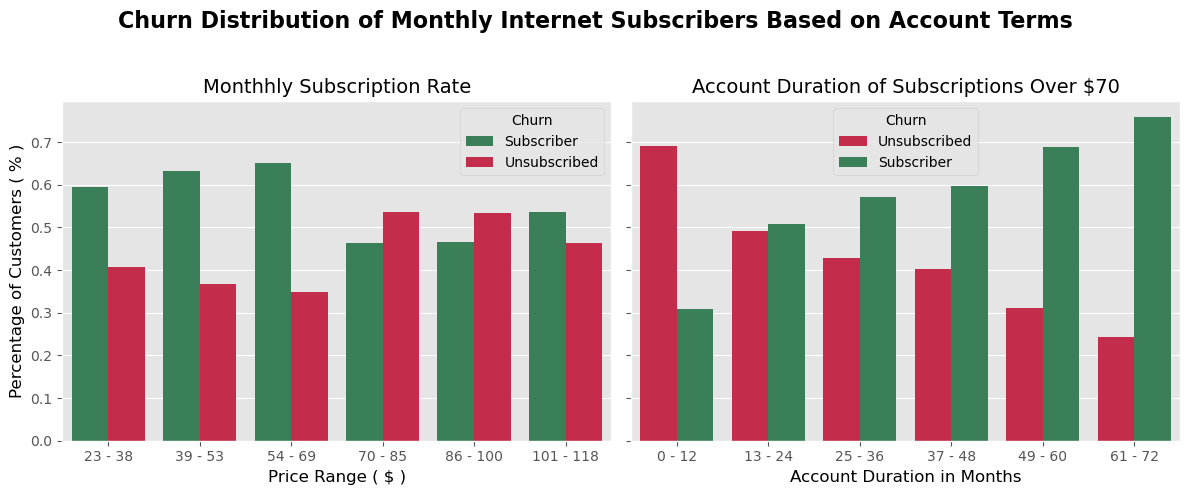

In [96]:
monthly_internet_subs = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] != 'No')].copy()
expensive_subs = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] != 'No')].copy()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)

# Stackoverflow code to create group ranges of numerical data
# https://stackoverflow.com/questions/74212136/pandas-groupby-and-then-pandas-cut-in-python
monthly_internet_subs['sub_range'] = pd.cut(monthly_internet_subs['MonthlyCharges'],
                                        bins=np.linspace(monthly_internet_subs['MonthlyCharges'].min(),monthly_internet_subs['MonthlyCharges'].max(),7),
                                        labels=['23 - 38','39 - 53','54 - 69','70 - 85','86 - 100','101 - 118'])
monthly_internet_subs = monthly_internet_subs.groupby('sub_range')['Churn'].value_counts(normalize=True).reset_index()

expensive_subs = expensive_subs[expensive_subs['MonthlyCharges'] > 70]
expensive_subs['mon_range'] = pd.cut(expensive_subs['tenure'],
                                      bins=[0,12,24,36,48,60,72],
                                      labels=['0 - 12','13 - 24','25 - 36','37 - 48','49 - 60','61 - 72'])
expensive_subs = expensive_subs.groupby('mon_range')['Churn'].value_counts(normalize=True).reset_index()

sns.barplot(ax=ax1, data=monthly_internet_subs, x='sub_range', y='proportion', hue='Churn', 
            palette={'Subscriber':'seagreen','Unsubscribed':'crimson'}, errorbar=None)
ax1.set_title('Monthhly Subscription Rate', color='black', fontsize=14)
ax1.set_xlabel('Price Range ( $ )', color='black')
ax1.set_ylabel('Percentage of Customers ( % )', color='black')

sns.barplot(ax=ax2, data=expensive_subs, x='mon_range', y='proportion', hue='Churn', 
            palette={'Subscriber':'seagreen','Unsubscribed':'crimson'}, errorbar=None)
ax2.set_title('Account Duration of Subscriptions Over $70', color='black', fontsize=14)
ax2.set_xlabel('Account Duration in Months', color='black')

plt.suptitle('Churn Distribution of Monthly Internet Subscribers Based on Account Terms', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_3.png')
plt.show()

In [82]:
try:
    print('Script Executed Successfully')
except:
    print('FAILED')

Script Executed Successfully
